According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. The data set link: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset. My PhD topic is about rehabilitation robot,especially for neuromotor rehabilitaion after stroke. So, I choose this dataset which is related to stroke. Furthermore, I chose this dataset because it has a very clear table structure and contains mutiple kinds of attributes (nominal, ordinal, numeric (interval,ratio)).Mutiple types of attributes allow me to implement and test various methods mentioned in lectures on it.  

# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [2]:
# Common imports
import os
import numpy as np

# load data
import tarfile
import urllib
import pandas as pd

In [3]:
# plot figures
import matplotlib as mpl
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

import seaborn as sns

In [88]:
# machine learning
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split

# Loading Data

In [5]:
# load the original dataset
csv_path = os.path.join("datasets/healthcare-dataset-stroke-data.csv")
patient = pd.read_csv(csv_path)

In [6]:
patient.head()
# As shown in the head table, there are 12 attributes in the dataset, including:
# id, gender, age, hypertension, heart_disease, marital status, work, residence, glucose bmi, smoking, stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
patient.info() 
# 5110 instances in total. some bmi values are missed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Basic Analysis

In [8]:
patient["gender"].value_counts() 
# Three types, Female, Male, Other

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

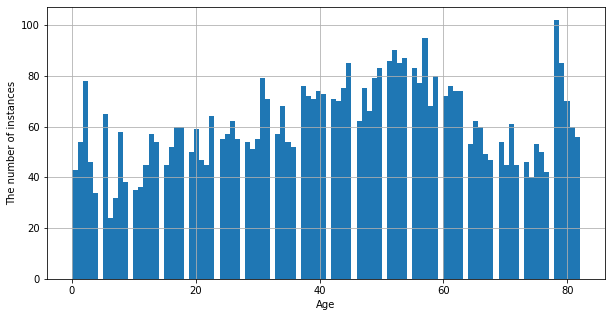

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [9]:
patient["age"].hist(bins=100, figsize=(10,5))
plt.xlabel("Age")
plt.ylabel("The number of instances")
plt.show()
patient["age"].describe(include='all') 
# The figure shows the distribution of instances' age
# The distribution is relatively uniform

In [10]:
patient["hypertension"].value_counts()
# Two types: Yes or No

0    4612
1     498
Name: hypertension, dtype: int64

In [11]:
patient["heart_disease"].value_counts() 
# Two types: Yes or No

0    4834
1     276
Name: heart_disease, dtype: int64

In [12]:
patient["ever_married"].value_counts() 
# Two types: Yes or No

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [13]:
patient["work_type"].value_counts() 
# Five types: Private, Self-employed, children, Govt_job, Never_worked

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [14]:
patient["Residence_type"].value_counts() 
# Two types: Urban, Rural

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

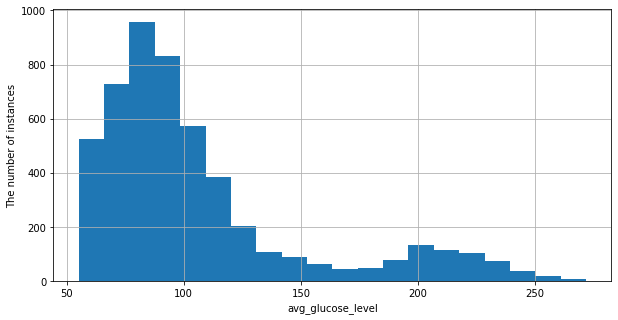

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [15]:
patient["avg_glucose_level"].hist(bins=20, figsize=(10,5))
plt.xlabel("avg_glucose_level")
plt.ylabel("The number of instances")
plt.show()
patient["avg_glucose_level"].describe(include='all') 
# avg_glucose_level doesn't have obvious outliers but there are two peaks. It can be normalised by min-max normalisation. 

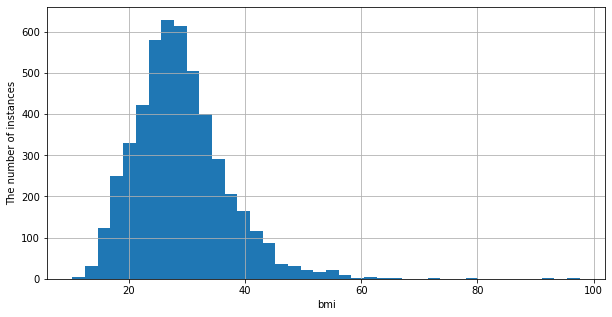

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [16]:
patient["bmi"].hist(bins=40, figsize=(10,5))
plt.xlabel("bmi")
plt.ylabel("The number of instances")
plt.show()
patient["bmi"].describe(include='all')
# bmi has obvious outliers, so the z normalisation is more suitable for this attribute. 

In [17]:
patient["smoking_status"].value_counts() 
# Four types: never smoked, Unknown, formerly smoked, smokes

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [18]:
patient["stroke"].value_counts() 
# Two types: Yes or No

0    4861
1     249
Name: stroke, dtype: int64

# Discover and Visualize Dataset

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='avg_glucose_level', ylabel='age'>,
        <AxesSubplot:xlabel='bmi', ylabel='age'>,
        <AxesSubplot:xlabel='stroke', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>,
        <AxesSubplot:xlabel='avg_glucose_level', ylabel='avg_glucose_level'>,
        <AxesSubplot:xlabel='bmi', ylabel='avg_glucose_level'>,
        <AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>],
       [<AxesSubplot:xlabel='age', ylabel='bmi'>,
        <AxesSubplot:xlabel='avg_glucose_level', ylabel='bmi'>,
        <AxesSubplot:xlabel='bmi', ylabel='bmi'>,
        <AxesSubplot:xlabel='stroke', ylabel='bmi'>],
       [<AxesSubplot:xlabel='age', ylabel='stroke'>,
        <AxesSubplot:xlabel='avg_glucose_level', ylabel='stroke'>,
        <AxesSubplot:xlabel='bmi', ylabel='stroke'>,
        <AxesSubplot:xlabel='stroke', ylabel='stroke'>]], dtype=object)

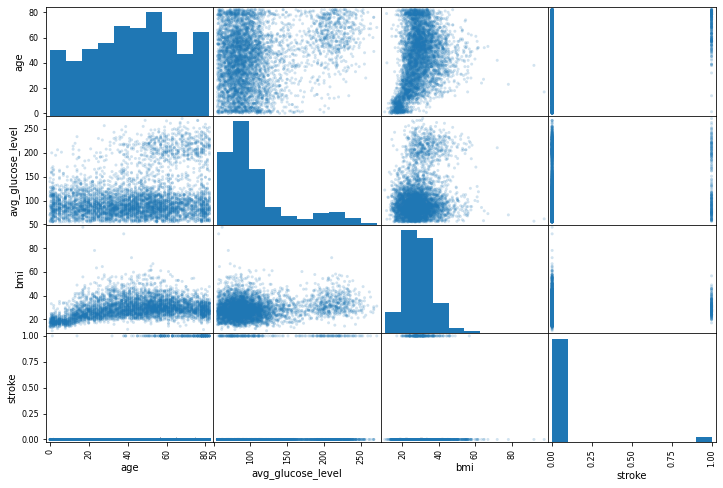

In [19]:
# Firstly, the relation between stroke and numerical attributes
attributes = ["age", "avg_glucose_level", "bmi","stroke"];
scatter_matrix(patient[attributes], figsize=(12, 8),alpha=0.2)
# The plots are not very indicative for showing correlations between glucose level/bmi and stroke. 
# It shows that more stroke cases occurs on older people (more dense). 

Text(0, 0.5, 'The number of stroke cases')

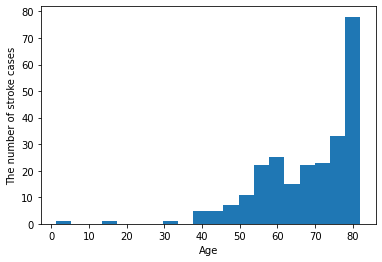

In [20]:
# To clearly show the correlation between stroke and age, I picked out the instance having Yes for stroke.
strok_column = patient["stroke"]
strok_arr = np.array(strok_column)
index = np.where(strok_arr == 1)
age_column = patient["age"]
age_arr = np.array(age_column)
age_stroke = age_arr[index]
plt.hist(age_stroke,bins=20) 
plt.xlabel("Age")
plt.ylabel("The number of stroke cases")
# stroke cases become more frequecnt with the rise of ages

Text(0, 0.5, 'The number of stroke cases')

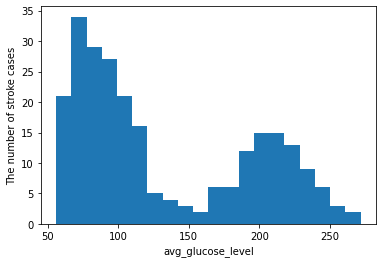

In [21]:
glucose_column = patient["avg_glucose_level"]
glucose_arr = np.array(glucose_column)
glucose_stroke = glucose_arr[index]
plt.hist(glucose_stroke,bins=20)
plt.xlabel("avg_glucose_level")
plt.ylabel("The number of stroke cases")
# interestingly, there are two peaks in the figure. why? try draw the histogram 0-45 and 45-90

Text(0, 0.5, 'The number of stroke cases')

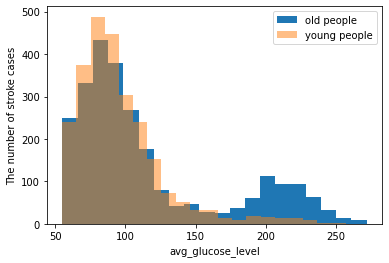

In [22]:
age_column = patient["age"]
age_arr = np.array(age_column)
old_index = np.where(age_arr >= 45)
young_index = np.where(age_arr < 45)
old_glucose = glucose_arr[old_index]
young_glucose = glucose_arr[young_index]
plt.hist(old_glucose,bins=20,label="old people")
plt.hist(young_glucose,bins=20,alpha=0.5,label="young people")
plt.legend()
plt.xlabel("avg_glucose_level")
plt.ylabel("The number of stroke cases")
# old people could have abnormally high glucose levels due to dieases. Young people has a normal distribution.

[0.05106382978723404, 0.047094188376753505, 0.0]


<AxesSubplot:xlabel='stroke', ylabel='age'>

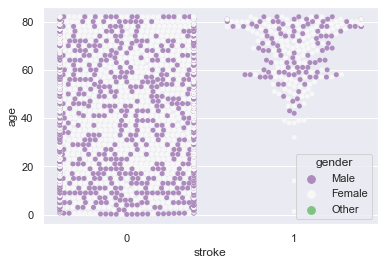

In [23]:
# Secondly, categorical attributes and stroke
gender_column = patient["gender"]
gender_arr = np.array(gender_column)

gender_index1 = np.where(gender_arr == 'Male')
gender_index2 = np.where(gender_arr == 'Female')
gender_index3 = np.where(gender_arr == 'Other') 

gender_total_number = [len(gender_index1[0]), len(gender_index2[0]), len(gender_index3[0])]
male_stroke = sum(strok_arr[gender_index1])
female_stroke = sum(strok_arr[gender_index2])
other_stroke = sum(strok_arr[gender_index3])

gender_stroke_percentage = [male_stroke/gender_total_number[0],female_stroke/gender_total_number[1],other_stroke/gender_total_number[2]]
print(gender_stroke_percentage)

sns.set(style="darkgrid")
sns.swarmplot(x="stroke", y="age",hue="gender", data=patient, palette="PRGn")

# the age distribution in diferent ages is uniform. The stroke rates of male and female are similar. 
# The only instance with other gender is not a stroke patient.

[0.0656128839844915, 0.016505406943653957]


<AxesSubplot:xlabel='stroke', ylabel='age'>

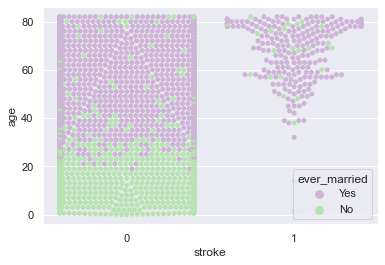

In [24]:
married_column = patient["ever_married"]
married_arr = np.array(married_column)

married_index1 = np.where(married_arr == 'Yes')
married_index2 = np.where(married_arr == 'No') 

married_total_number = [len(married_index1[0]), len(married_index2[0])]
mar_stroke = sum(strok_arr[married_index1])
nonmar_stroke = sum(strok_arr[married_index2])

married_stroke_percentage = [mar_stroke/married_total_number[0],nonmar_stroke/married_total_number[1]]
print(married_stroke_percentage)

sns.swarmplot(x="stroke", y="age",hue="ever_married", data=patient, palette="PRGn")

# Married people are more likely to get stroke.
# Most non-married people are children or young peope below 30 years old.

[0.04756871035940803, 0.07909604519774012, 0.053231939163498096]


<AxesSubplot:xlabel='stroke', ylabel='age'>

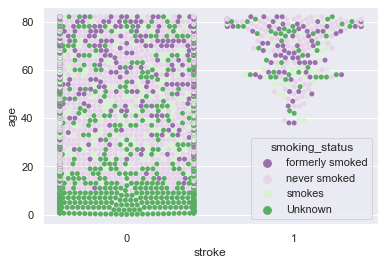

In [25]:
# the percentage of stroke cases in people with different smoking conditions
smoking_column = patient["smoking_status"]
smoking_arr = np.array(smoking_column)

smoking_index1 = np.where(smoking_arr == 'never smoked')
smoking_index2 = np.where(smoking_arr == 'formerly smoked')
smoking_index3 = np.where(smoking_arr == 'smokes') 

smoking_total_number = [len(smoking_index1[0]), len(smoking_index2[0]), len(smoking_index3[0])]
ns_stroke = sum(strok_arr[smoking_index1])
fs_stroke = sum(strok_arr[smoking_index2])
s_stroke = sum(strok_arr[smoking_index3])

smoking_stroke_percentage = [ns_stroke/smoking_total_number[0],fs_stroke/smoking_total_number[1], s_stroke/smoking_total_number[2]]
print(smoking_stroke_percentage)

sns.swarmplot(x="stroke", y="age",hue="smoking_status", data=patient, palette="PRGn")

# People having smoking have higher stroke percentage than people never smoking but the difference is not obivious
# The most of unknown smoking status happen in children. So we can set unknown smoking to never smoked. 

[0.05094017094017094, 0.07936507936507936, 0.002911208151382824, 0.0502283105022831, 0.0]


<AxesSubplot:xlabel='stroke', ylabel='age'>

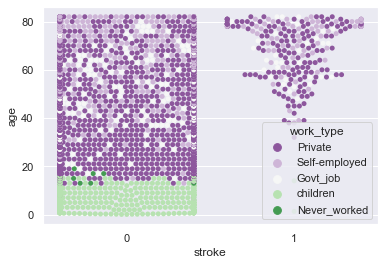

In [26]:
# the percentage of stroke cases in people with different work conditions
work_column = patient["work_type"]
work_arr = np.array(work_column)

work_index1 = np.where(work_arr == 'Private')
work_index2 = np.where(work_arr == 'Self-employed')
work_index3 = np.where(work_arr == 'children')
work_index4 = np.where(work_arr == 'Govt_job')
work_index5 = np.where(work_arr == 'Never_worked')


work_total_number = [len(work_index1[0]), len(work_index2[0]), len(work_index3[0]), len(work_index4[0]),len(work_index5[0])]
p_stroke = sum(strok_arr[work_index1])
s_stroke = sum(strok_arr[work_index2])
c_stroke = sum(strok_arr[work_index3])
g_stroke = sum(strok_arr[work_index4])
n_stroke = sum(strok_arr[work_index5])

work_stroke_percentage = [p_stroke/work_total_number[0],s_stroke/work_total_number[1],\
                               c_stroke/work_total_number[2],g_stroke/work_total_number[3],\
                               n_stroke/work_total_number[4]]
print(work_stroke_percentage)

sns.swarmplot(x="stroke", y="age",hue="work_type", data=patient, palette="PRGn")

# People having jobs are more likely to get stroke. 
# never_worked people are all about 20 years old. Maybe students. 

In [27]:
# the percentage of stroke cases in people with different residence conditions
residence_column = patient["Residence_type"]
residence_arr = np.array(residence_column)

residence_index1 = np.where(residence_arr == 'Urban')
residence_index2 = np.where(residence_arr == 'Rural')

residence_total_number = [len(residence_index1[0]), len(residence_index2[0])]
urban_stroke = sum(strok_arr[residence_index1])
rural_stroke = sum(strok_arr[residence_index2])

residence_stroke_percentage = [urban_stroke/residence_total_number[0],rural_stroke/residence_total_number[1]]

print(residence_stroke_percentage)
# The stroke percentage are similar in urban and rural people

[0.052003081664098616, 0.045346062052505964]


[0.13253012048192772, 0.03967909800520382]


<AxesSubplot:xlabel='stroke', ylabel='age'>

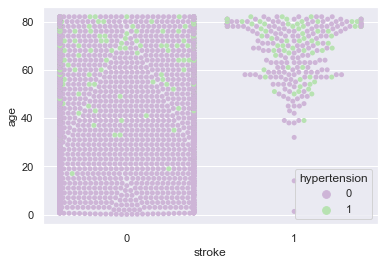

In [28]:
hyper_column = patient["hypertension"]
hyper_arr = np.array(hyper_column)

hyper_index1 = np.where(hyper_arr == 1)
hyper_index2 = np.where(hyper_arr == 0) 

hyper_total_number = [len(hyper_index1[0]), len(hyper_index2[0])]
hyperyes_stroke = sum(strok_arr[hyper_index1])
hyperno_stroke = sum(strok_arr[hyper_index2])

hyper_stroke_percentage = [hyperyes_stroke/hyper_total_number[0],hyperno_stroke/hyper_total_number[1]]
print(hyper_stroke_percentage)

sns.swarmplot(x="stroke", y="age",hue="hypertension", data=patient, palette="PRGn")

# Older people are more likely to have hypertension.
# People with hypertension have higher stroke rate.

[0.17028985507246377, 0.041787339677285894]


<AxesSubplot:xlabel='stroke', ylabel='age'>

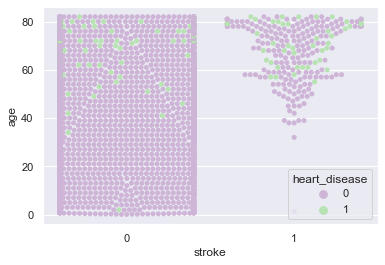

In [29]:
heart_column = patient["heart_disease"]
heart_arr = np.array(heart_column)

heart_index1 = np.where(heart_arr == 1)
heart_index2 = np.where(heart_arr == 0) 

heart_total_number = [len(heart_index1[0]), len(heart_index2[0])]
heartyes_stroke = sum(strok_arr[heart_index1])
heartno_stroke = sum(strok_arr[heart_index2])

heart_stroke_percentage = [heartyes_stroke/heart_total_number[0],heartno_stroke/heart_total_number[1]]
print(heart_stroke_percentage)

sns.swarmplot(x="stroke", y="age",hue="heart_disease", data=patient, palette="PRGn")

# Older people are more likely to have heart diseases.
# People with heart dieases have higher stroke rate.

In [30]:
# In conclude, age, hypertension, heart_disease, ever_married, work_type and smoking_status show relatively strong relation with stroke rate.

# Prepare the Data for Machine Learning Algorithms

In [31]:
patient.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [32]:
# There are 1544 instances with unknown smoking_statues.This attribute is nominal so the missing data cannot been replaced by a mean value.
# The amount is too much so it is not reasonable to delete these data. Therefore, I didn't delete these unknown data.
# The most of unknown smoking status happen in children. So we can set unknown smoking to never smoked. 

for i in range(0,5110):
    if(patient['smoking_status'][i] == 'Unknown'):
        patient['smoking_status'][i] = 'never smoked'
patient['smoking_status'].value_counts()

<ipython-input-32-e029993b4e68>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient['smoking_status'][i] = 'never smoked'


never smoked       3436
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [33]:
# bmi has missing data, so cleaning the dataset
# bmi is a very important attribute so I did not remove the attribute and just removed some instance that do not hane bmi data.
# I do not use mean to replace the missing data because that it is likely to introduce wrong instances.
patient_clean = patient.dropna(subset=["bmi"])
patient_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [34]:
# attribute encoding
# check the object attributes

print(pd.Categorical(patient_clean['gender']))
print(pd.Categorical(patient_clean['ever_married']))
print(pd.Categorical(patient_clean['work_type']))
print(pd.Categorical(patient_clean['Residence_type']))
print(pd.Categorical(patient_clean['smoking_status']))

[Male, Male, Female, Female, Male, ..., Female, Female, Female, Male, Female]
Length: 4909
Categories (3, object): [Female, Male, Other]
[Yes, Yes, Yes, Yes, Yes, ..., No, Yes, Yes, Yes, Yes]
Length: 4909
Categories (2, object): [No, Yes]
[Private, Private, Private, Self-employed, Private, ..., children, Self-employed, Self-employed, Private, Govt_job]
Length: 4909
Categories (5, object): [Govt_job, Never_worked, Private, Self-employed, children]
[Urban, Rural, Urban, Rural, Urban, ..., Rural, Urban, Rural, Rural, Urban]
Length: 4909
Categories (2, object): [Rural, Urban]
[formerly smoked, never smoked, smokes, never smoked, formerly smoked, ..., never smoked, never smoked, never smoked, formerly smoked, never smoked]
Length: 4909
Categories (3, object): [formerly smoked, never smoked, smokes]


In [35]:
# 1. implement pd.map on 'ever_married' and 'Residence_type'

# 1- two classes
married_mapping = {'No': 0, 'Yes': 1}
patient_clean['ever_married'] = patient_clean['ever_married'].map(married_mapping)

Residence_mapping = {'Rural': 0, 'Urban': 1}
patient_clean['Residence_type'] = patient_clean['Residence_type'].map(Residence_mapping)

<ipython-input-35-a7c639b29a12>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_clean['ever_married'] = patient_clean['ever_married'].map(married_mapping)
<ipython-input-35-a7c639b29a12>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_clean['Residence_type'] = patient_clean['Residence_type'].map(Residence_mapping)


In [36]:
# 2. implement OneHotEncoder on 'gender','work_type','smoking_status'

# 2-more than two classes: gender, work_type, smoking_status
from sklearn.preprocessing import OneHotEncoder
attribute_encoder = OneHotEncoder()
encoded_gender = attribute_encoder.fit_transform(patient_clean[["gender"]])
patient_clean['Female'] = encoded_gender.toarray()[:,0]
patient_clean['Male'] = encoded_gender.toarray()[:,1]
patient_clean['Other'] = encoded_gender.toarray()[:,2]

encoded_work = attribute_encoder.fit_transform(patient_clean[["work_type"]])
patient_clean['Government'] = encoded_work.toarray()[:,0]
patient_clean['NeverW'] = encoded_work.toarray()[:,1]
patient_clean['Private'] = encoded_work.toarray()[:,2]
patient_clean['Self'] = encoded_work.toarray()[:,3]
patient_clean['Children'] = encoded_work.toarray()[:,4]

encoded_smoking = attribute_encoder.fit_transform(patient_clean[["smoking_status"]])
patient_clean['Formerly'] = encoded_smoking.toarray()[:,0]
patient_clean['NeverS'] = encoded_smoking.toarray()[:,1]
patient_clean['smokes'] = encoded_smoking.toarray()[:,2]

patient_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   int64  
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   int64  
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
 12  Female             4909 non-null   float64
 13  Male               4909 non-null   float64
 14  Other              4909 non-null   float64
 15  Government         4909 non-null   float64
 16  NeverW             4909 

<ipython-input-36-dca1acb1154d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_clean['Female'] = encoded_gender.toarray()[:,0]
<ipython-input-36-dca1acb1154d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_clean['Male'] = encoded_gender.toarray()[:,1]
<ipython-input-36-dca1acb1154d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [37]:
patient_clean = patient_clean.drop("id", axis=1) 
patient_clean = patient_clean.drop("gender", axis=1) 
patient_clean = patient_clean.drop("work_type", axis=1) 
patient_clean = patient_clean.drop("smoking_status", axis=1) 

patient_clean.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Female,Male,Other,Government,NeverW,Private,Self,Children,Formerly,NeverS,smokes
0,67.0,0,1,1,1,228.69,36.6,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,80.0,0,1,1,0,105.92,32.5,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,49.0,0,0,1,1,171.23,34.4,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,79.0,1,0,1,0,174.12,24.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,81.0,0,0,1,1,186.21,29.0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [38]:
# The gluose level and bmi are numeric (interval), so they should be normalised to make data in these three attributes more comparable. 

# They have different units, so I use attribute normalisation. 
# There are obvious outliers in the data so the normalization method is z-score normalization
# normal_gluose = (patient_clean["avg_glucose_level"] - patient_clean["avg_glucose_level"].mean()) / patient_clean["avg_glucose_level"].std()
# normal_bmi = (patient_clean["bmi"] - patient_clean["bmi"].mean()) / patient_clean["bmi"].std()
# normal_age = (patient_clean["age"] - patient_clean["age"].mean()) / patient_clean["age"].std()

# And also, to avoid negative values, we can also use min-max normalisation 
mm_gluose = (patient_clean["avg_glucose_level"] - patient_clean["avg_glucose_level"].min()) / (patient_clean["avg_glucose_level"].max()-patient_clean["avg_glucose_level"].min())
mm_bmi = (patient_clean["bmi"] - patient_clean["bmi"].min()) / (patient_clean["bmi"].max()-patient_clean["bmi"].min())
mm_age = (patient_clean["age"] - patient_clean["age"].min()) / (patient_clean["age"].max()-patient_clean["age"].min())

#robust_gluose = (patient_clean["avg_glucose_level"] - patient_clean["avg_glucose_level"].median())  / (patient_clean["avg_glucose_level"].quantile(0.75) - patient_clean["avg_glucose_level"].quantile(0.25)) 
#robust_bmi = (patient_clean["bmi"] - patient_clean["bmi"].median())  / (patient_clean["bmi"].quantile(0.75) - patient_clean["bmi"].quantile(0.25))
#robust_age = (patient_clean["age"] - patient_clean["age"].median())  / (patient_clean["age"].quantile(0.75) - patient_clean["age"].quantile(0.25))

patient_clean["avg_glucose_level"]=mm_gluose
patient_clean["bmi"]=mm_bmi
patient_clean["age"]=mm_age

patient_clean.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Female,Male,Other,Government,NeverW,Private,Self,Children,Formerly,NeverS,smokes
0,0.816895,0,1,1,1,0.801265,0.301260,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.975586,0,1,1,0,0.234512,0.254296,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.597168,0,0,1,1,0.536008,0.276060,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.963379,1,0,1,0,0.549349,0.156930,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,0.987793,0,0,1,1,0.605161,0.214204,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# zeroR

In [39]:
from sklearn.dummy import DummyClassifier
zeror = DummyClassifier(strategy="most_frequent")
zeror.fit(patient["hypertension"], patient["stroke"])
zeror.predict(patient["hypertension"])
zeror.score(patient["hypertension"], patient["stroke"])
# other attributes are similar, so omit

0.9512720156555773

# OneR

In [40]:
from collections import defaultdict
from operator import itemgetter

In [41]:
def train_feature_value(x_d,y,feature_index,value):
    class_counts=defaultdict(int)
    for sample,i in zip(x_d[feature_index],y):
        if sample==value:
            class_counts[i]+=1
    sorted_class_counts=sorted(class_counts.items(),key=itemgetter(1),reverse=True)#sort
    most_frequent_class=sorted_class_counts[0][0]
    incorrect_predictions=[class_count for class_value,class_count in class_counts.items() if class_value!=most_frequent_class]#Number of statistical errors
    error=sum(incorrect_predictions)
    return most_frequent_class,error

In [42]:
def train_on_feature(x,y,f_i):
    values=set(x[f_i])
    predictors={}
    errors=[]
    for i in values:
        most_class,error=train_feature_value(x,y,f_i,i)
        predictors[i]=most_class
        errors.append(error)
    total_error=sum(errors)
    return predictors,total_error

In [43]:
def predict(x_test,model):
    variable=model['va']
    predictor=model['pr']
    y_predicted=np.array([predictor[int(sample[variable])]for sample in x_test])
    return  y_predicted

In [44]:
y_train = patient["stroke"]
x_train = [np.array(patient["hypertension"]), np.array(patient["heart_disease"]), 
           np.array(patient["ever_married"]), np.array(patient["work_type"]), 
           np.array(patient["Residence_type"]), np.array(patient["smoking_status"])]

In [45]:
all_predictors={}
errors={}
for f_i in range(len(x_train)):
    predictors,total_error=train_on_feature(x_train,y_train,f_i)
    all_predictors[f_i]=predictors
    errors[f_i]=total_error
best_v,best_e=sorted(errors.items(),key=itemgetter(1))[0]
model={'va':best_v,'pr':all_predictors[best_v]}
print(all_predictors)
print(errors)
# obvious, this method doesn't work, these six attributes lead to the same classification results. The error is all stroke=1. 
# therefore, fail to predict.

{0: {0: 0, 1: 0}, 1: {0: 0, 1: 0}, 2: {'No': 0, 'Yes': 0}, 3: {'Private': 0, 'Govt_job': 0, 'Self-employed': 0, 'Never_worked': 0, 'children': 0}, 4: {'Urban': 0, 'Rural': 0}, 5: {'smokes': 0, 'never smoked': 0, 'formerly smoked': 0}}
{0: 249, 1: 249, 2: 249, 3: 249, 4: 249, 5: 249}


# Naïve Bayes Classifier on the Whole Data Set

In [46]:
# The part 1 of the assignment assumes that there is only a training set and no testing set, so I did not split the data set
attributes = ['age','hypertension','heart_disease','ever_married','Residence_type','avg_glucose_level','bmi','Female','Male',
 'Other','Government','NeverW','Private','Self','Children','Formerly','smokes','NeverS']
target = ['stroke']
X_train = patient_clean[attributes]
y_train = patient_clean[target]

In [47]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
trained_model = model.fit(np.array(X_train), np.ravel(y_train))

# I use the train data set to test the model
y_pre = model.predict(X_train)
cm_Multinomial = confusion_matrix(y_pre, y_train)

In [48]:
# Gaussian naïve Bayes
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
trained_model = model.fit(np.array(X_train), np.ravel(y_train))

# I use the train data set to test the model
y_pre = model.predict(X_train)
cm_Gaussian = confusion_matrix(y_pre, y_train)

In [49]:
# Bernoulli naïve Bayes
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_selection import SelectFromModel

model = BernoulliNB()
model.fit(np.array(X_train), np.ravel(y_train))

# I use the train data set to test the model
y_pre = model.predict(X_train)
cm_Bernoulli = confusion_matrix(y_pre, y_train)

In [50]:
print('Multinomial Naive Bayes:\n',cm_Multinomial)
print('Gaussian naïve Bayes:\n',cm_Gaussian)
print('Bernoulli naïve Bayes:\n',cm_Bernoulli)
print(['tn','fn'],'\n',['fp','tp'])

# It is obvious that the accuracy of Multinomial and Bernoulli are higher than Gaussian 
# because Gaussian incorrectly predict many non-stroke instances as stroke.
# We can also find that Multinomial Naive Bayes fails to predict any stroke cases but Bernoulli works.
# So, in the following code, we first use Bernoulli naïve Bayes. 

Multinomial Naive Bayes:
 [[4697  209]
 [   3    0]]
Gaussian naïve Bayes:
 [[ 711    1]
 [3989  208]]
Bernoulli naïve Bayes:
 [[4673  202]
 [  27    7]]
['tn', 'fn'] 
 ['fp', 'tp']


# Evaluating Measures 1

In [51]:
tn = cm_Bernoulli[0,0]# no stroke,right prediction 
fp = cm_Bernoulli[1,0]# no stroke,but wrong prediction
tp = cm_Bernoulli[1,1]# stroke,right prediction
fn = cm_Bernoulli[0,1]# stroke,but wrong prediction

accuracy  = (tp + tn) / (tp + fp + tn + fn)
specificity = tp / (tp + fn)# how many real stroke patient are found.
sensitivity = tn / (tn + fp)# how many healthy people  are found.
precision = tp / (tp + fp)# how many real stroke patient are found.
recall    = tp / (tp + fn)# the right alarm rate in all stroke alarm.
fmeasure  = 2 * precision * recall / (precision + recall)

print(f'Accuracy : {accuracy}')# very high accuracy but it is due to high tn.
print(f'sensitivity : {sensitivity}')# very high,most healthy people are predicted.This is because there are so many healthy instances. 
print(f'Specificity : {specificity}')# low recall, it means the alarm of stroke are not very reliable.
print(f'Recall   : {recall}')# low recall, it means the alarm of stroke are not very reliable.
print(f'Precision: {precision}')# very low precision, it means the model is able to predict stroke but not effectively
print(f'F score : {fmeasure}') # this metrix will be used later to compare different modes' performance

Accuracy : 0.953350987981259
sensitivity : 0.9942553191489362
Specificity : 0.03349282296650718
Recall   : 0.03349282296650718
Precision: 0.20588235294117646
F score : 0.05761316872427984


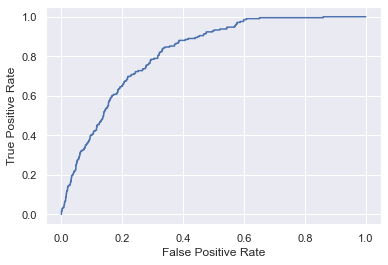

In [52]:
# draw ROC curve based on BernoulliNB()
# reference: https://in.springboard.com/blog/naive-bayes-classification/

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

# I use the train data set to test the model
y_score=trained_model.predict_proba(X_train)

# plot ROC curve
fpr, tpr, _ = roc_curve(y_train, y_score[:,1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
# TPR is recall; FPR is fp/(fp+tp)

# Naïve Bayes Classifier on the Data Subset

In [53]:
# Best features -- Univariate Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(np.array(X_train), np.ravel(y_train))
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                Specs      Score
1        hypertension  90.543821
2       heart_disease  88.779204
0                 age  38.452374
14           Children  27.785710
3        ever_married  18.829557
5   avg_glucose_level  17.198932
15           Formerly  13.378757
13               Self  12.667614
17             NeverS   6.180984
16             smokes   1.933969


In [54]:
# subset1 includes the features with the highest scores of chi-squared statistical test
features1 = ["hypertension","heart_disease","age","Children","ever_married","avg_glucose_level","Formerly","Self"]
subset1 = patient_clean[features1]

# subset2 includes more features 
features2 = ["hypertension","heart_disease","age","Children","Self","Government","Private","NeverW","ever_married","avg_glucose_level"]
subset2 = patient_clean[features2]

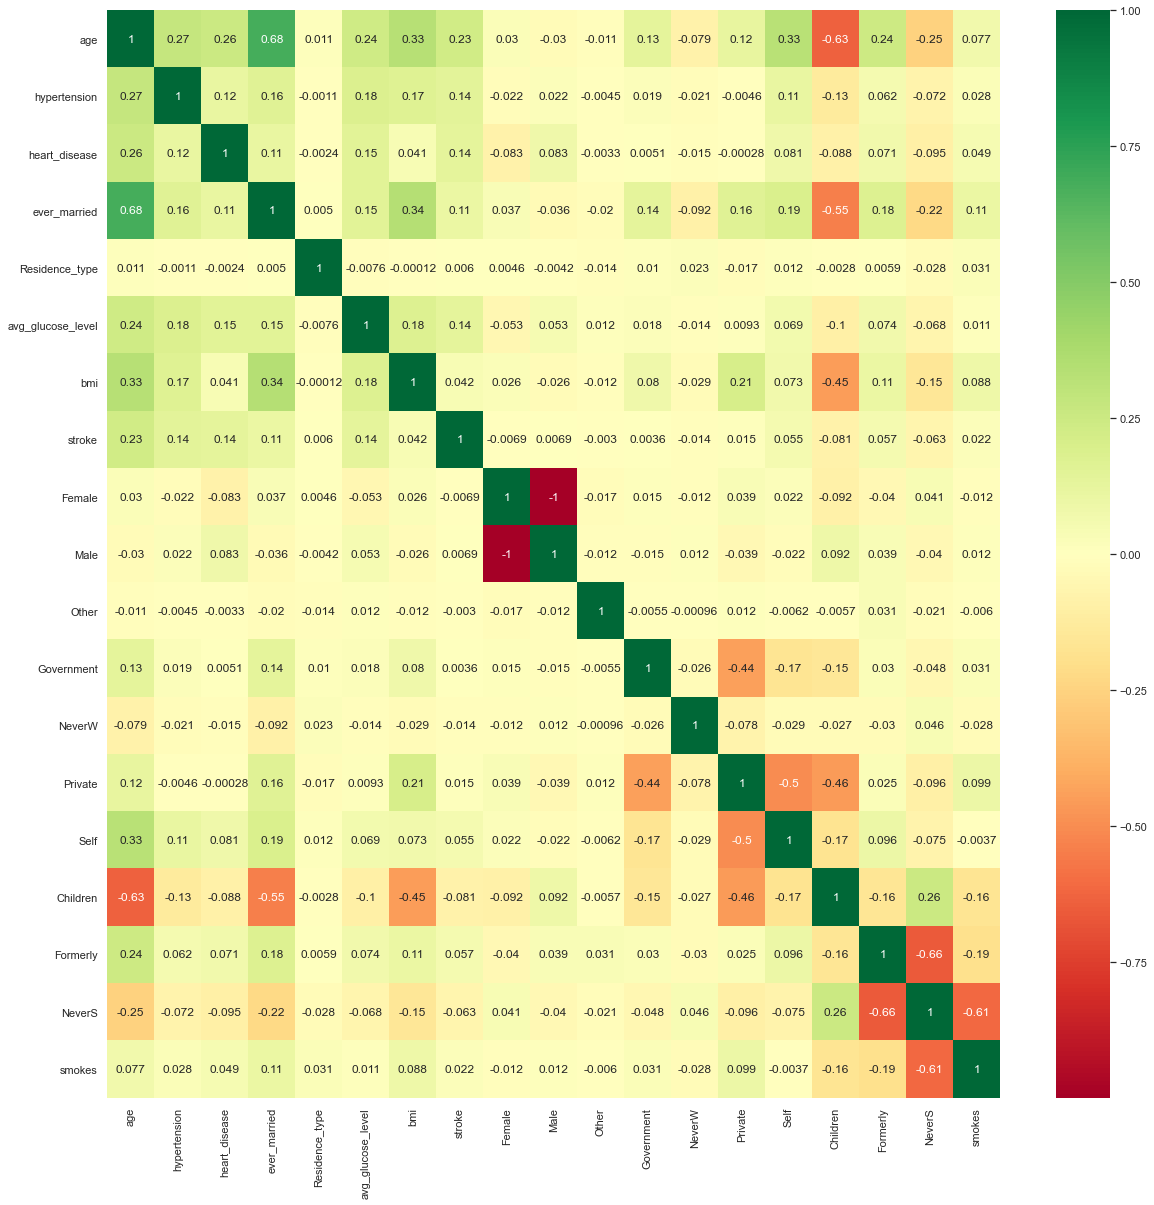

In [55]:
# Best features -- Correlation Matrix with Heatmap
corrmat = patient_clean.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(patient_clean[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [56]:
# subset3 includes the features with the highest correlation with stroke according to the correlation heatmap
features3 = ["age","hypertension","heart_disease","ever_married","avg_glucose_level"]
subset3 = patient_clean[features3]

# Evaluating Measures 2

In [57]:
# whole data set
print(f'Accuracy : {accuracy}')
print(f'sensitivity : {sensitivity}')
print(f'Specificity : {specificity}')
print(f'Recall   : {recall}')
print(f'Precision: {precision}')
print(f'F score : {fmeasure}') 

Accuracy : 0.953350987981259
sensitivity : 0.9942553191489362
Specificity : 0.03349282296650718
Recall   : 0.03349282296650718
Precision: 0.20588235294117646
F score : 0.05761316872427984


In [58]:
# subset1
model1 = BernoulliNB()
model1.fit(np.array(subset1), np.ravel(y_train))

y_pre = model1.predict(subset1)
cm_Bernoulli1 = confusion_matrix(y_pre, y_train)

tn = cm_Bernoulli1[0,0]# no stroke,right prediction 
fp = cm_Bernoulli1[1,0]# no stroke,but wrong prediction
tp = cm_Bernoulli1[1,1]# stroke,right prediction
fn = cm_Bernoulli1[0,1]# stroke,but wrong prediction

accuracy  = (tp + tn) / (tp + fp + tn + fn)
specificity = tp / (tp + fn)# how many real stroke patient are found.
sensitivity = tn / (tn + fp)# how many healthy people  are found.
precision = tp / (tp + fp)# how many real stroke patient are found.
recall    = tp / (tp + fn)# the right alarm rate in all stroke alarm.
fmeasure  = 2 * precision * recall / (precision + recall)

print(f'Accuracy : {accuracy}')
print(f'sensitivity : {sensitivity}')
print(f'Specificity : {specificity}')
print(f'Recall   : {recall}')
print(f'Precision: {precision}')
print(f'F score : {fmeasure}') 

Accuracy : 0.9535546954573233
sensitivity : 0.9953191489361702
Specificity : 0.014354066985645933
Recall   : 0.014354066985645933
Precision: 0.12
F score : 0.025641025641025644


In [59]:
# subset2
model2 = BernoulliNB()
model2.fit(np.array(subset2), np.ravel(y_train))

y_pre = model2.predict(subset2)
cm_Bernoulli2 = confusion_matrix(y_pre, y_train)

tn = cm_Bernoulli2[0,0]# no stroke,right prediction 
fp = cm_Bernoulli2[1,0]# no stroke,but wrong prediction
tp = cm_Bernoulli2[1,1]# stroke,right prediction
fn = cm_Bernoulli2[0,1]# stroke,but wrong prediction

accuracy  = (tp + tn) / (tp + fp + tn + fn)
specificity = tp / (tp + fn)# how many real stroke patient are found.
sensitivity = tn / (tn + fp)# how many healthy people  are found.
precision = tp / (tp + fp)# how many real stroke patient are found.
recall    = tp / (tp + fn)# the right alarm rate in all stroke alarm.
fmeasure  = 2 * precision * recall / (precision + recall)

print(f'Accuracy : {accuracy}')
print(f'sensitivity : {sensitivity}')
print(f'Specificity : {specificity}')
print(f'Recall   : {recall}')
print(f'Precision: {precision}')
print(f'F score : {fmeasure}') 

Accuracy : 0.9515176206966796
sensitivity : 0.9923404255319149
Specificity : 0.03349282296650718
Recall   : 0.03349282296650718
Precision: 0.16279069767441862
F score : 0.05555555555555556


In [60]:
# subset3
model3 = BernoulliNB()
model3.fit(np.array(subset3), np.ravel(y_train))

y_pre = model3.predict(subset3)
cm_Bernoulli3 = confusion_matrix(y_pre, y_train)

tn = cm_Bernoulli3[0,0]# no stroke,right prediction 
fp = cm_Bernoulli3[1,0]# no stroke,but wrong prediction
tp = cm_Bernoulli3[1,1]# stroke,right prediction
fn = cm_Bernoulli3[0,1]# stroke,but wrong prediction

accuracy  = (tp + tn) / (tp + fp + tn + fn)
specificity = tp / (tp + fn)# how many real stroke patient are found.
sensitivity = tn / (tn + fp)# how many healthy people  are found.
precision = tp / (tp + fp)# how many real stroke patient are found.
recall    = tp / (tp + fn)# the right alarm rate in all stroke alarm.
fmeasure  = 2 * precision * recall / (precision + recall)

print(f'Accuracy : {accuracy}')
print(f'sensitivity : {sensitivity}')
print(f'Specificity : {specificity}')
print(f'Recall   : {recall}')
print(f'Precision: {precision}')
print(f'F score : {fmeasure}') 

Accuracy : 0.9574251375025463
sensitivity : 1.0
Specificity : 0.0
Recall   : 0.0
Precision: nan
F score : nan


<ipython-input-60-b63b4ecf0bfc>:16: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp / (tp + fp)# how many real stroke patient are found.


In [61]:
print(cm_Bernoulli)
print(cm_Bernoulli1)
print(cm_Bernoulli2)
print(cm_Bernoulli3)

[[4673  202]
 [  27    7]]
[[4678  206]
 [  22    3]]
[[4664  202]
 [  36    7]]
[[4700  209]
 [   0    0]]


# Evaluating Measures 3

In [62]:
# subset4 includes work, marriage, heart_disease, age, hypertension,avg_glucose_level. without region, bmi and gender
features4 = ["hypertension","heart_disease","age","Children","Self","Government","Private","ever_married","avg_glucose_level","NeverS",
            "Formerly","smokes"]
subset4 = patient_clean[features4]

model4 = BernoulliNB()
model4.fit(np.array(subset4), np.ravel(y_train))

y_pre = model4.predict(subset4)
cm_Bernoulli4 = confusion_matrix(y_pre, y_train)

tn = cm_Bernoulli4[0,0]# no stroke,right prediction 
fp = cm_Bernoulli4[1,0]# no stroke,but wrong prediction
tp = cm_Bernoulli4[1,1]# stroke,right prediction
fn = cm_Bernoulli4[0,1]# stroke,but wrong prediction

accuracy  = (tp + tn) / (tp + fp + tn + fn)
specificity = tp / (tp + fn)# how many real stroke patient are found.
sensitivity = tn / (tn + fp)# how many healthy people  are found.
precision = tp / (tp + fp)# how many real stroke patient are found.
recall    = tp / (tp + fn)# the right alarm rate in all stroke alarm.
fmeasure  = 2 * precision * recall / (precision + recall)

print(f'Accuracy : {accuracy}')
print(f'sensitivity : {sensitivity}')
print(f'Specificity : {specificity}')
print(f'Recall   : {recall}')
print(f'Precision: {precision}')
print(f'F score : {fmeasure}') 

print(cm_Bernoulli4)

Accuracy : 0.953350987981259
sensitivity : 0.9942553191489362
Specificity : 0.03349282296650718
Recall   : 0.03349282296650718
Precision: 0.20588235294117646
F score : 0.05761316872427984
[[4673  202]
 [  27    7]]


# Discussion

It is manifest that the score of f-measure of the whole data set is the higher than the three subsets.There are two possible reasons for this result. On the one hand, the attributes in the data set I used have very weak relationship with the target, stroke, so it will be very difficult for the model to predict stroke by too little features (as the result of subset 3). On the other hand, the total number of attributes in the dataset are little, especially compared with image data sets. The noises or disturbance between features are tiny so that more features only enhance the prediction performance rather than disturb predicting.

hypertension, heart_disease and age are the most important features to evaluate the possibility of stroke. At the same time, people's work, marriage and smoking habits also affect the possiblity of stroke, while the effect are not direct and predominant. 

In Evaluating Measure 3, I estabilished a subset which does not include the region, bmi and gender attributes. Its' prediction result (performance metrics) is completely the same as that of the whole dataset. These three attributes almost do not have influence on the prediction. It implys that people's living region, bmi and gender do not increase stroke incidence. 

It is no doubt that we can not precisely and accurately predict stroke by these simple attributes but this prediction model still has positive functions. Firstly, the prediciton results of the model shows which factors and habits in people' daily life are more likely to induce stroke. Secondly, the model can give a rough alarm for people and remind high risk group of taking timely diagnosis. 

# Part 2 - Clustering

In [63]:
from sklearn.cluster import KMeans

k = 2
kmeans = KMeans(n_clusters=k, random_state=10)
y_pred = kmeans.fit_predict(X_train)
#  X_train y_train

In [64]:
cm_KMeans = confusion_matrix(y_pre, y_train)

tn = cm_KMeans[0,0]# no stroke,right prediction 
fp = cm_KMeans[1,0]# no stroke,but wrong prediction
tp = cm_KMeans[1,1]# stroke,right prediction
fn = cm_KMeans[0,1]# stroke,but wrong prediction

accuracy  = (tp + tn) / (tp + fp + tn + fn)
specificity = tp / (tp + fn)# how many real stroke patient are found.
sensitivity = tn / (tn + fp)# how many healthy people  are found.
precision = tp / (tp + fp)# how many real stroke patient are found.
recall    = tp / (tp + fn)# the right alarm rate in all stroke alarm.
fmeasure  = 2 * precision * recall / (precision + recall)

print(f'Accuracy : {accuracy}')
print(f'sensitivity : {sensitivity}')
print(f'Specificity : {specificity}')
print(f'Recall   : {recall}')
print(f'Precision: {precision}')
print(f'F score : {fmeasure}') 

print(cm_KMeans)

Accuracy : 0.953350987981259
sensitivity : 0.9942553191489362
Specificity : 0.03349282296650718
Recall   : 0.03349282296650718
Precision: 0.20588235294117646
F score : 0.05761316872427984
[[4673  202]
 [  27    7]]


Due to the property of the data set, the clustering performance is not very good. Therefore, I used the data set for heart disease predition instead of the stroke one in the following parts.

In [67]:
# load another dataset
csv_path = os.path.join("datasets/heart.csv")
patient2 = pd.read_csv(csv_path)

patient2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


age <br>
sex <br>
chest pain type (4 values) <br>
resting blood pressure <br>
serum cholestoral in mg/dl <br>
fasting blood sugar > 120 mg/dl <br>
resting electrocardiographic results (values 0,1,2) <br> 
maximum heart rate achieved <br>
exercise induced angina <br>
oldpeak = ST depression induced by exercise relative to rest <br>
the slope of the peak exercise ST segment <br>
number of major vessels (0-3) colored by flourosopy <br>
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect <br>

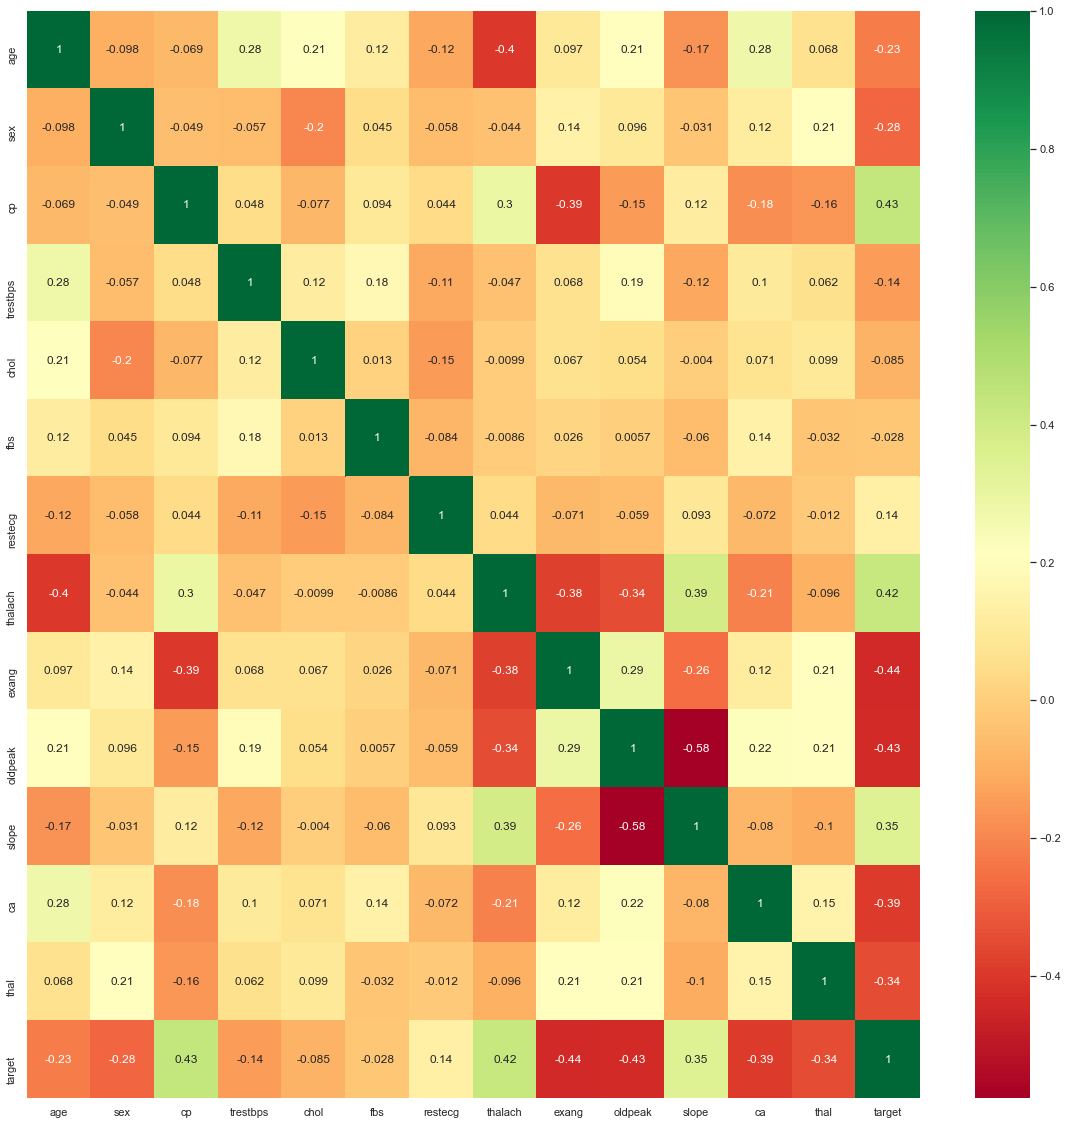

In [72]:
# Best features -- Correlation Matrix with Heatmap
corrmat = patient2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(patient2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [73]:
patient2['target'].value_counts() 

1    165
0    138
Name: target, dtype: int64

# Kmeans

In [76]:
attributes = patient2.columns[:-1]
# attributes = ['cp','thalach','exang','oldpeak','slope','ca','thal']
target = ['target']
X_train = patient2[attributes]
y_train = patient2[target]

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

In [77]:
k = 2
kmeans = KMeans(n_clusters=k,random_state=0)
y_pre = kmeans.fit_predict(X_train_scaled)

Accuracy : 0.7194719471947195
sensitivity : 0.5507246376811594
Specificity : 0.8606060606060606
Recall   : 0.8606060606060606
Precision: 0.696078431372549
F score : 0.7696476964769647


<AxesSubplot:>

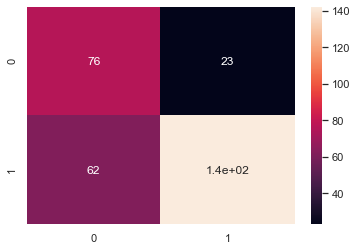

In [78]:
cm_KMeans = confusion_matrix(y_pre, y_train)

tn = cm_KMeans[0,0]# no heart disease,right prediction 
fp = cm_KMeans[1,0]# no heart disease,but wrong prediction
tp = cm_KMeans[1,1]# heart disease,right prediction
fn = cm_KMeans[0,1]# heart disease,but wrong prediction

accuracy  = (tp + tn) / (tp + fp + tn + fn)
specificity = tp / (tp + fn)# how many real heart disease patient are found.
sensitivity = tn / (tn + fp)# how many healthy people  are found.
precision = tp / (tp + fp)# how many real heart disease patient are found.
recall    = tp / (tp + fn)# the right alarm rate in all heart disease alarm.
fmeasure  = 2 * precision * recall / (precision + recall)

print(f'Accuracy : {accuracy}')
print(f'sensitivity : {sensitivity}')
print(f'Specificity : {specificity}')
print(f'Recall   : {recall}')
print(f'Precision: {precision}')
print(f'F score : {fmeasure}') 

sns.heatmap(cm_KMeans, annot=True)

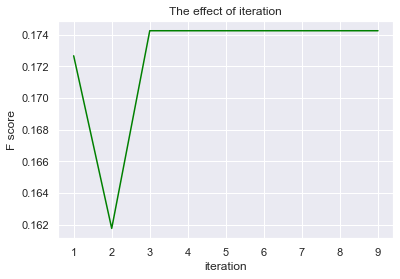

In [79]:
# iterations
def Fmeasure(y_pre, y_train):
    cm_KMeans = confusion_matrix(y_pre, y_train)
    tn = cm_KMeans[0,0]# no stroke,right prediction 
    fp = cm_KMeans[1,0]# no stroke,but wrong prediction
    tp = cm_KMeans[1,1]# stroke,right prediction
    fn = cm_KMeans[0,1]# stroke,but wrong prediction
    precision = tp / (tp + fp)# how many real stroke patient are found.
    recall    = tp / (tp + fn)# the right alarm rate in all stroke alarm.
    f = 2 * precision * recall / (precision + recall)
    return f

iteration = []
fscore = []
for i in range(1,10):
    kmeans_iter = KMeans(n_clusters=2, init="random", n_init=1,
                     algorithm="full", max_iter=i, random_state=0)
    y_pre = kmeans_iter.fit_predict(X_train_scaled)
    f = Fmeasure(y_pre, y_train)
    iteration.append(i)
    fscore.append(f)

plt.plot(iteration, fscore, color='green')
plt.xlabel("iteration")
plt.ylabel("F score")
plt.title("The effect of iteration")
plt.show()

# increase the iteration may decrease the classification accuracy
# enough iteration result in a steady accuracy

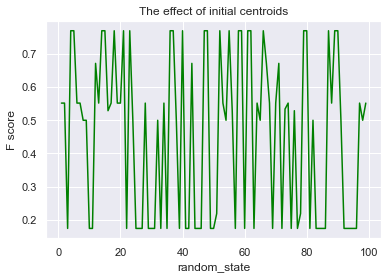

In [80]:
# Variability
random = []
fscore = []
inertia = []
for i in range(1,100):
    kmeans_ran = KMeans(n_clusters=2, init="random", n_init=1,
                     algorithm="full", max_iter=10, random_state=i)
    y_pre = kmeans_ran.fit_predict(X_train_scaled)
    f = Fmeasure(y_pre, y_train)
    random.append(i)
    fscore.append(f)
    inertia.append(kmeans_ran.score(X_train_scaled))

plt.plot(random, fscore, color='green')
plt.xlabel("random_state")
plt.ylabel("F score")
plt.title("The effect of initial centroids")
plt.show()

# the initial random centroids have a obvious impact on the accuracy

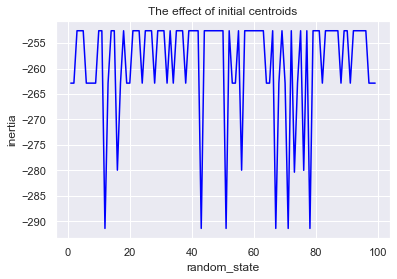

In [81]:
plt.plot(random, inertia, color='blue')
plt.xlabel("random_state")
plt.ylabel("inertia")
plt.title("The effect of initial centroids")
plt.show()

# The inertia values are more steady than the accuracy

Text(0, 0.5, 'Inertia')

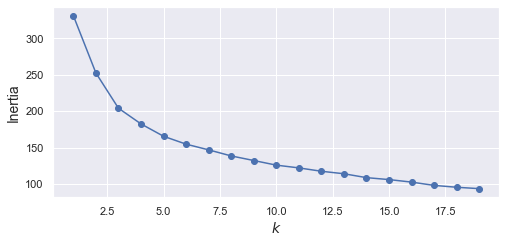

In [82]:
# the number of clusters
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train_scaled)
                for k in range(1,20)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 20), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

# 5 is a good number of clusters for the problem. 5 clusters are corresponding to 5 level of disease incidence possibilities.

# other methods-GMM

Accuracy : 0.6138613861386139
sensitivity : 0.8260869565217391
Specificity : 0.43636363636363634
Recall   : 0.43636363636363634
Precision: 0.75
F score : 0.5517241379310345


<AxesSubplot:>

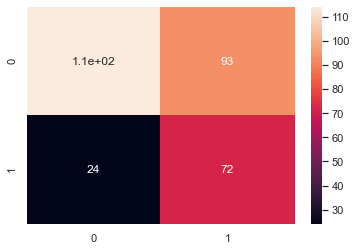

In [83]:
# Gaussian Mixture Model
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2, random_state=0)
y_pre = gm.fit_predict(X_train_scaled)

cm_GM = confusion_matrix(y_pre, y_train)

tn = cm_GM[0,0]# no heart disease,right prediction 
fp = cm_GM[1,0]# no heart disease,but wrong prediction
tp = cm_GM[1,1]# heart disease,right prediction
fn = cm_GM[0,1]# heart disease,but wrong prediction

accuracy  = (tp + tn) / (tp + fp + tn + fn)
specificity = tp / (tp + fn)# how many real heart disease patient are found.
sensitivity = tn / (tn + fp)# how many healthy people  are found.
precision = tp / (tp + fp)# how many real heart disease patient are found.
recall    = tp / (tp + fn)# the right alarm rate in all heart disease alarm.
fmeasure  = 2 * precision * recall / (precision + recall)

print(f'Accuracy : {accuracy}')
print(f'sensitivity : {sensitivity}')
print(f'Specificity : {specificity}')
print(f'Recall   : {recall}')
print(f'Precision: {precision}')
print(f'F score : {fmeasure}') 

sns.heatmap(cm_GM, annot=True)

# other methods-Hierarchical Clustering

Accuracy : 0.3201320132013201
sensitivity : 0.5507246376811594
Specificity : 0.12727272727272726
Recall   : 0.12727272727272726
Precision: 0.25301204819277107
F score : 0.1693548387096774


<AxesSubplot:>

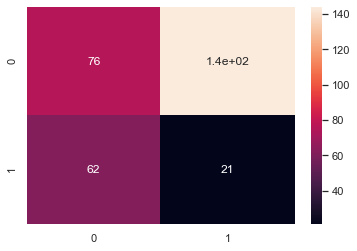

In [84]:
# Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2)
y_pre = ac.fit_predict(X_train_scaled)

cm_AC = confusion_matrix(y_pre, y_train)

tn = cm_AC[0,0]# no heart disease,right prediction 
fp = cm_AC[1,0]# no heart disease,but wrong prediction
tp = cm_AC[1,1]# heart disease,right prediction
fn = cm_AC[0,1]# heart disease,but wrong prediction

accuracy  = (tp + tn) / (tp + fp + tn + fn)
specificity = tp / (tp + fn)# how many real heart disease patient are found.
sensitivity = tn / (tn + fp)# how many healthy people  are found.
precision = tp / (tp + fp)# how many real heart disease patient are found.
recall    = tp / (tp + fn)# the right alarm rate in all heart disease alarm.
fmeasure  = 2 * precision * recall / (precision + recall)

print(f'Accuracy : {accuracy}')
print(f'sensitivity : {sensitivity}')
print(f'Specificity : {specificity}')
print(f'Recall   : {recall}')
print(f'Precision: {precision}')
print(f'F score : {fmeasure}') 

sns.heatmap(cm_AC, annot=True)

# other methods-Bayesian classification

Accuracy : 0.7887788778877888
sensitivity : 0.7028985507246377
Specificity : 0.8606060606060606
Recall   : 0.8606060606060606
Precision: 0.7759562841530054
F score : 0.8160919540229884


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


<AxesSubplot:>

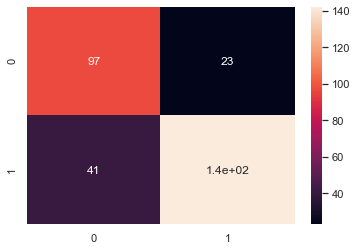

In [86]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
trained_model = model.fit(X_train_scaled, y_train)

y_pre = model.predict(X_train_scaled)
cm_MNB = confusion_matrix(y_pre, y_train)

tn = cm_MNB[0,0]# no heart disease,right prediction 
fp = cm_MNB[1,0]# no heart disease,but wrong prediction
tp = cm_MNB[1,1]# heart disease,right prediction
fn = cm_MNB[0,1]# heart disease,but wrong prediction

accuracy  = (tp + tn) / (tp + fp + tn + fn)
specificity = tp / (tp + fn)# how many real heart disease patient are found.
sensitivity = tn / (tn + fp)# how many healthy people  are found.
precision = tp / (tp + fp)# how many real heart disease patient are found.
recall    = tp / (tp + fn)# the right alarm rate in all heart disease alarm.
fmeasure  = 2 * precision * recall / (precision + recall)

print(f'Accuracy : {accuracy}')
print(f'sensitivity : {sensitivity}')
print(f'Specificity : {specificity}')
print(f'Recall   : {recall}')
print(f'Precision: {precision}')
print(f'F score : {fmeasure}') 

sns.heatmap(cm_MNB, annot=True)

Text(0, 0.5, 'Evaluation score')

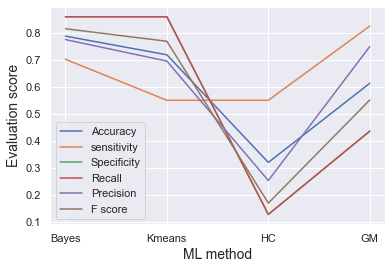

In [87]:
data = np.array([[0.7887788778877888,0.7028985507246377,0.8606060606060606,0.8606060606060606,0.7759562841530054,0.8160919540229884],
        [0.7194719471947195,0.5507246376811594,0.8606060606060606,0.8606060606060606,0.696078431372549,0.7696476964769647],
        [0.3201320132013201,0.5507246376811594,0.12727272727272726,0.12727272727272726,0.25301204819277107,0.1693548387096774],
        [0.6138613861386139,0.8260869565217391,0.43636363636363634,0.43636363636363634,0.75               ,0.5517241379310345]       
        ])
x = ['Bayes','Kmeans','HC','GM']
lab = ['Accuracy','sensitivity','Specificity','Recall','Precision','F score']
# plt.figure(figsize=(8, 3.5))

for i in range(0,6):
    plt.plot(x,data[:,i],label = lab[i])
plt.legend()
plt.xlabel("ML method", fontsize=14)
plt.ylabel("Evaluation score", fontsize=14)

Bayesian classification has the best overall performance.
Kmeans also shows good performance but a little worse than Bayesian classification except for recall.This classifier can maximise the likelihood of finding potential patients.
HC and GM have worse classification performance than Kmeans but GM has the highest sensitivity. So, GM can be used to find the completely healthy people. 

# Part 3 Decision Trees

In [95]:
scaler = MinMaxScaler()
patient2[patient2.columns] = scaler.fit_transform(patient2[patient2.columns])
patient2.head()

# 10-fold cross-validation

The best depth of DT: 3


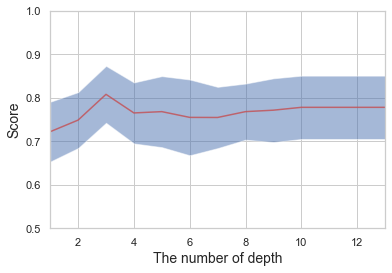

In [96]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
sns.set(style="whitegrid")

target = ['target']
attributes = patient2.columns[:-1]
X = patient2[attributes]
y = patient2[target]

# mean and standard deviation, also testsed the influence of the max depth
# the max is 13, because the data set 13 feature attributes
means = []
stds = []
for i in range(1,14):
    tree_clf = DecisionTreeClassifier(max_depth=i, random_state=0)
    scores = cross_val_score(tree_clf, X, np.ravel(y), cv=10)
    means.append(scores.mean())
    stds.append(scores.std())
# print(means,'\n',stds)

means = np.array(means)
stds = np.array(stds)
plt.plot(range(1,14),means,'r',alpha=0.8)
# plt.errorbar(range(1,14),means,yerr=stds,  fmt='o', color='black',ecolor='lightgray', elinewidth=3, capsize=0);
plt.fill_between(range(1,14),means-stds,means+stds,alpha=0.5)
plt.xlabel("The number of depth", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.xlim(1, 13)
plt.ylim(0.5, 1);

bestDepth = np.argmax(means)+1
print('The best depth of DT:',bestDepth)
# the standard deviation is steady. The best depth of decision tree is 3. 

# training an testing data sets

In [97]:
train_set, test_set = train_test_split(patient2, test_size=0.2, random_state=0)
train_set.info()
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 74 to 172
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       242 non-null    float64
 1   sex       242 non-null    float64
 2   cp        242 non-null    float64
 3   trestbps  242 non-null    float64
 4   chol      242 non-null    float64
 5   fbs       242 non-null    float64
 6   restecg   242 non-null    float64
 7   thalach   242 non-null    float64
 8   exang     242 non-null    float64
 9   oldpeak   242 non-null    float64
 10  slope     242 non-null    float64
 11  ca        242 non-null    float64
 12  thal      242 non-null    float64
 13  target    242 non-null    float64
dtypes: float64(14)
memory usage: 28.4 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 225 to 89
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       61 non-null     float64
 1   s

In [98]:
attributes = patient2.columns[:-1]
# attributes = ['cp','thalach','exang','oldpeak','slope','ca','thal']
target = ['target']

X_train = train_set[attributes]
y_train = train_set[target]
X_test = test_set[attributes]
y_test = test_set[target]

[Text(248.0, 323.4, 'X[2] <= 0.167\ngini = 0.497\nsamples = 242\nvalue = [111, 131]'),
 Text(124.0, 230.99999999999997, 'X[11] <= 0.125\ngini = 0.405\nsamples = 117\nvalue = [84, 33]'),
 Text(62.0, 138.6, 'X[12] <= 0.833\ngini = 0.494\nsamples = 54\nvalue = [24, 30]'),
 Text(31.0, 46.19999999999999, 'gini = 0.367\nsamples = 33\nvalue = [8, 25]'),
 Text(93.0, 46.19999999999999, 'gini = 0.363\nsamples = 21\nvalue = [16, 5]'),
 Text(186.0, 138.6, 'X[0] <= 0.719\ngini = 0.091\nsamples = 63\nvalue = [60, 3]'),
 Text(155.0, 46.19999999999999, 'gini = 0.0\nsamples = 47\nvalue = [47, 0]'),
 Text(217.0, 46.19999999999999, 'gini = 0.305\nsamples = 16\nvalue = [13, 3]'),
 Text(372.0, 230.99999999999997, 'X[1] <= 0.5\ngini = 0.339\nsamples = 125\nvalue = [27, 98]'),
 Text(310.0, 138.6, 'X[11] <= 0.375\ngini = 0.042\nsamples = 47\nvalue = [1, 46]'),
 Text(279.0, 46.19999999999999, 'gini = 0.0\nsamples = 43\nvalue = [0, 43]'),
 Text(341.0, 46.19999999999999, 'gini = 0.375\nsamples = 4\nvalue = [1, 3

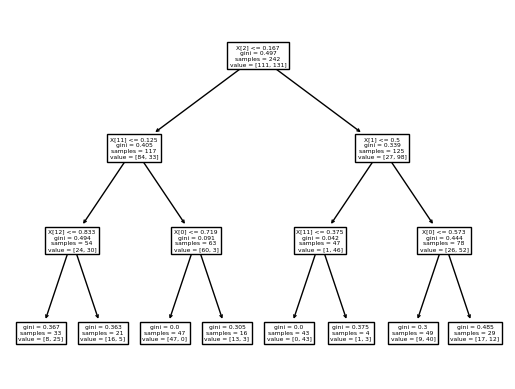

In [105]:
tree_clf = DecisionTreeClassifier(max_depth=bestDepth, random_state=0)
tree_clf.fit(X_train, y_train)

sns.reset_defaults()
plot_tree(tree_clf)

In [106]:
y_pre = tree_clf.predict(X_test)
unique, counts = np.unique(y_pre, return_counts=True)
print('y_pre:',dict(zip(unique, counts)))

unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))
print('y_test:',dict(zip(unique, counts)))

y_pre: {0.0: 30, 1.0: 31}
y_test: {0.0: 27, 1.0: 34}


Accuracy : 0.819672131147541
sensitivity : 0.8518518518518519
Specificity : 0.7941176470588235
Recall   : 0.7941176470588235
Precision: 0.8709677419354839
F score : 0.8307692307692308


<AxesSubplot:>

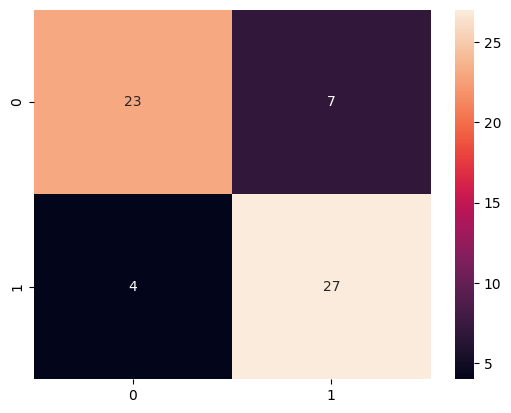

In [107]:
cm_DT = confusion_matrix(y_pre, y_test)

tn = cm_DT[0,0]# no stroke,right prediction 
fp = cm_DT[1,0]# no stroke,but wrong prediction
tp = cm_DT[1,1]# stroke,right prediction
fn = cm_DT[0,1]# stroke,but wrong prediction

accuracy  = (tp + tn) / (tp + fp + tn + fn)
specificity = tp / (tp + fn)# how many real stroke patient are found.
sensitivity = tn / (tn + fp)# how many healthy people  are found.
precision = tp / (tp + fp)# how many real stroke patient are found.
recall    = tp / (tp + fn)# the right alarm rate in all stroke alarm.
fmeasure  = 2 * precision * recall / (precision + recall)

print(f'Accuracy : {accuracy}')
print(f'sensitivity : {sensitivity}')
print(f'Specificity : {specificity}')
print(f'Recall   : {recall}')
print(f'Precision: {precision}')
print(f'F score : {fmeasure}') 

sns.heatmap(cm_DT, annot=True)

# higher F score than Kmeans, the decision tree generalize well to new data

# Decision Tree Parameters

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

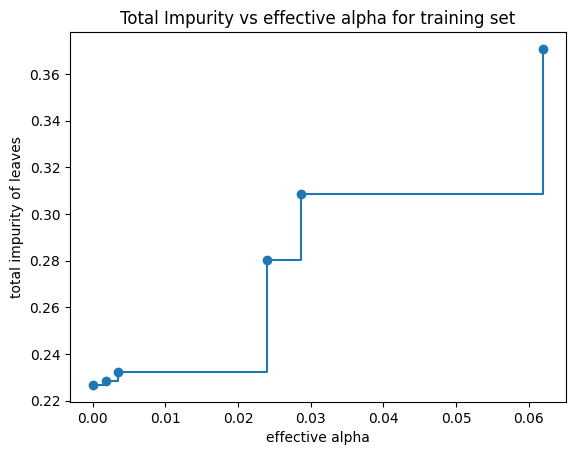

In [108]:
# confidence threshold for pruning
# this part was programmed according to the example provided in sklearn official tutorial.
# the first step is getting the effective alpha used for pruning
path = tree_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

# higher alpha, higher impurity

Number of nodes in the last tree is: 1 with ccp_alpha: 0.12583858815864823


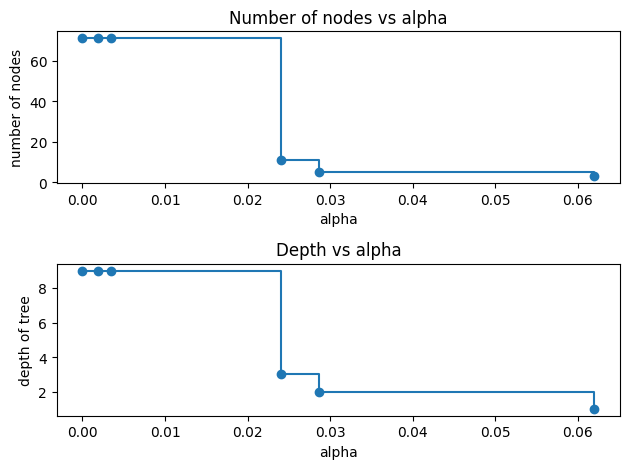

In [109]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

# the influence of effective alpha on the number of nodes and depth

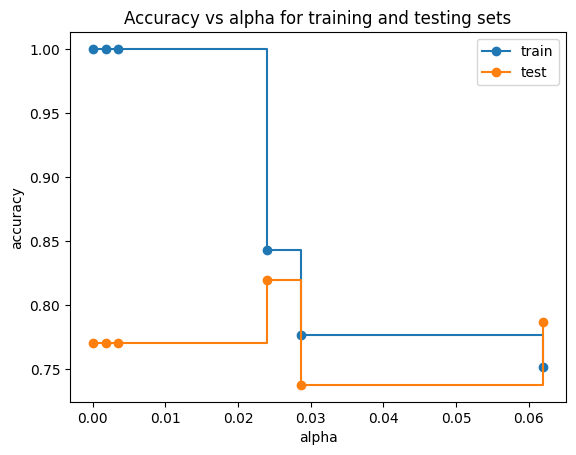

The best alpha is 0.023999401081048685


In [110]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

print('The best alpha is', ccp_alphas[3])
# higher alpha means very bad fitting to train data. The best generalisation is at the alpha of 0.024. 

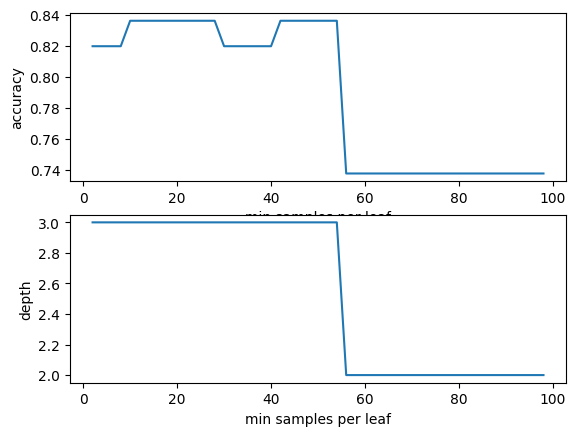

In [111]:
# min_samples_split
scores = []
depth = []
for min_samples in range(2,100,2):
    clf_BestMinSam = DecisionTreeClassifier(random_state=0, min_samples_split=min_samples, ccp_alpha=ccp_alphas[3])
    clf_BestMinSam.fit(X_train, y_train)
    depth.append(clf_BestMinSam.tree_.max_depth)
    scores.append(clf_BestMinSam.score(X_test, y_test))
    

fig, ax = plt.subplots(2, 1)
ax[0].set_xlabel("min samples per leaf")
ax[0].set_ylabel("accuracy")
ax[0].plot(range(2,100,2), scores)
ax[1].set_xlabel("min samples per leaf")
ax[1].set_ylabel("depth")
ax[1].plot(range(2,100,2), depth)
plt.show()
# The min samples set determine the depth of the tree, so further influence the accuracy

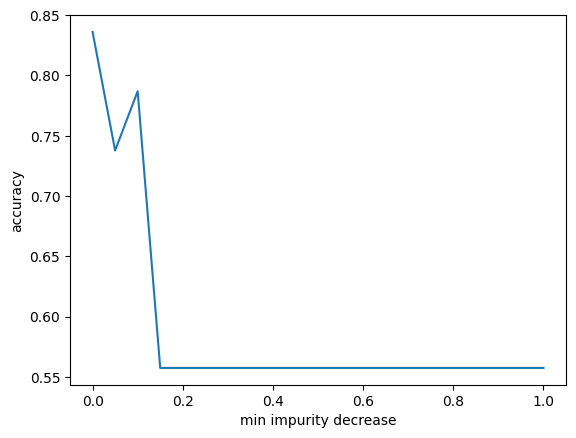

In [112]:
#  splitting criteria: min_impurity_decrease
scores = []
splitting_criteria = np.array([ i for i in range(0,21)])/20
for value in splitting_criteria:
    clf_BestCri = DecisionTreeClassifier(random_state=0, min_samples_split=20, ccp_alpha=ccp_alphas[3],min_impurity_decrease=value)
    clf_BestCri.fit(X_train, y_train)
    scores.append(clf_BestCri.score(X_test, y_test))

fig, ax = plt.subplots()
ax.set_xlabel("min impurity decrease")
ax.set_ylabel("accuracy")
ax.plot(splitting_criteria, scores)
plt.show()
# The impurity threshold of split should be low, otherwise the accuracy would drop. 

# The ratio of traning and testing sets

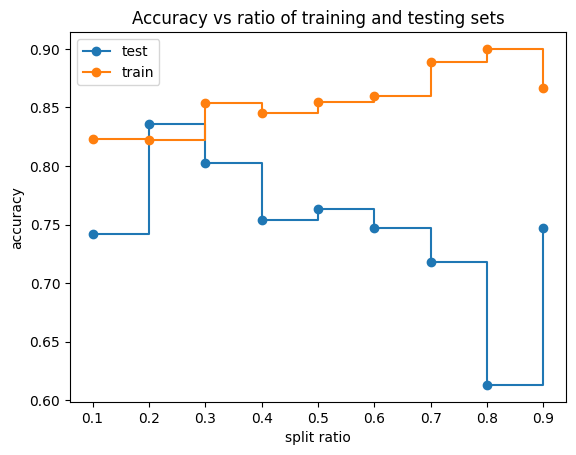

In [113]:
scores_test = []
scores_train = []
split_ratio = np.array([ i for i in range(1,10)])/10
for ratio in split_ratio:
    train_set, test_set = train_test_split(patient2, test_size=ratio, random_state=0)
    X_train = train_set[attributes]
    y_train = train_set[target]
    X_test = test_set[attributes]
    y_test = test_set[target]
    dtc = DecisionTreeClassifier(random_state=0, min_samples_split=20, ccp_alpha=ccp_alphas[3])
    dtc.fit(X_train, y_train)
    scores_test.append(dtc.score(X_test, y_test))
    scores_train.append(dtc.score(X_train, y_train))

fig, ax = plt.subplots()
ax.set_xlabel("split ratio")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs ratio of training and testing sets")
ax.plot(split_ratio, scores_test, marker="o", label="test", drawstyle="steps-post")
ax.plot(split_ratio, scores_train, marker="o", label="train", drawstyle="steps-post")
ax.legend()
plt.show()

# from 0.1 to 0.8, the accuracy of the classification on training sets increases but the classification on testing sets becomes wrose. 

# random forests

In [114]:
from sklearn.ensemble import RandomForestClassifier

train_set, test_set = train_test_split(patient2, test_size=0.2, random_state=0)
X_train = train_set[attributes]
y_train = train_set[target]
X_test = test_set[attributes]
y_test = test_set[target]

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, np.ravel(y_train))
y_pre = clf.predict(X_test)

Accuracy : 0.8852459016393442
sensitivity : 0.8148148148148148
Specificity : 0.9411764705882353
Recall   : 0.9411764705882353
Precision: 0.8648648648648649
F score : 0.9014084507042254


<AxesSubplot:>

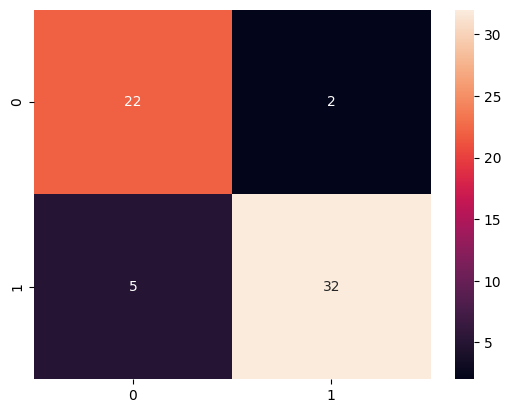

In [115]:
cm_RT = confusion_matrix(y_pre, y_test)

tn = cm_RT[0,0]# no stroke,right prediction 
fp = cm_RT[1,0]# no stroke,but wrong prediction
tp = cm_RT[1,1]# stroke,right prediction
fn = cm_RT[0,1]# stroke,but wrong prediction

accuracy  = (tp + tn) / (tp + fp + tn + fn)
specificity = tp / (tp + fn)# how many real stroke patient are found.
sensitivity = tn / (tn + fp)# how many healthy people  are found.
precision = tp / (tp + fp)# how many real stroke patient are found.
recall    = tp / (tp + fn)# the right alarm rate in all stroke alarm.
fmeasure  = 2 * precision * recall / (precision + recall)

print(f'Accuracy : {accuracy}')
print(f'sensitivity : {sensitivity}')
print(f'Specificity : {specificity}')
print(f'Recall   : {recall}')
print(f'Precision: {precision}')
print(f'F score : {fmeasure}') 

sns.heatmap(cm_RT, annot=True)
# better than the decision tree algorithm. The best classifier so far. 

# Part 4 Neural Networks

# Linear Classifier

(1.0, 10.0)

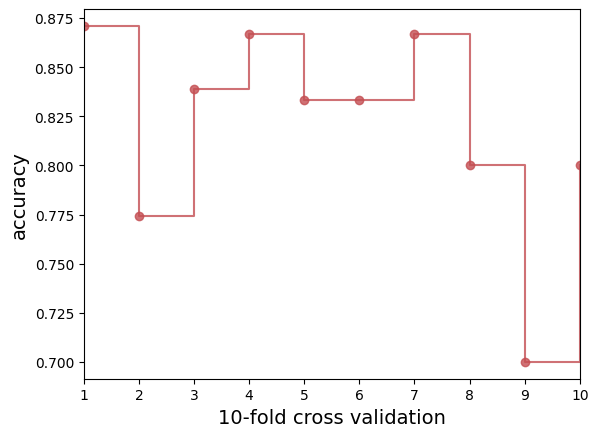

In [117]:
from sklearn.linear_model import LogisticRegression

target = ['target']
attributes = patient2.columns[:-1]
X = patient2[attributes]
y = patient2[target]

lin_reg = LogisticRegression(solver="lbfgs", random_state=0)
scores = cross_val_score(lin_reg, X, np.ravel(y), cv=10)
plt.plot(range(1,11),scores,'r',alpha=0.8, marker="o", drawstyle="steps-post")
plt.xlabel("10-fold cross validation", fontsize=14,)
plt.ylabel("accuracy", fontsize=14)
plt.xlim(1, 10)
scores.means
# plt.ylim(0.5, 1);
# the linear classifier can generalize to new data 
# the data set is not completely linearly separable

# multilayer perceptron

In [118]:
from sklearn.neural_network import MLPClassifier

train_set, test_set = train_test_split(patient2, test_size=0.2, random_state=0)
X_train = train_set[attributes]
y_train = train_set[target]
X_test = test_set[attributes]
y_test = test_set[target]

identity
logistic
tanh
relu


D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0, 0.5, 'Evaluation score')

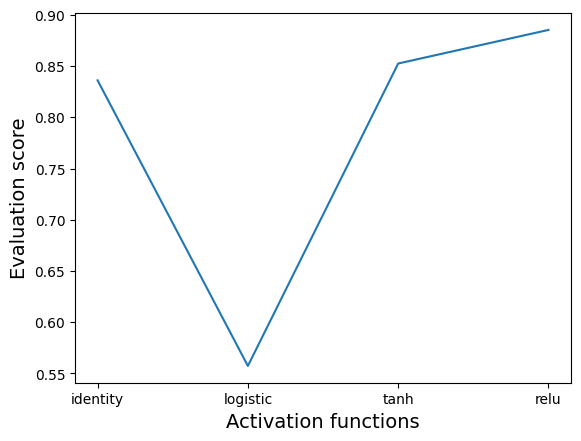

In [119]:
# activation functions
functions = ["identity","logistic","tanh","relu"]
scores = [] 
for index in range(0,4):
    print(functions[index])
    MLP = MLPClassifier(hidden_layer_sizes=(32,16,4),
                        activation=functions[index],random_state=0).fit(X_train, np.ravel(y_train))
    scores.append(MLP.score(X_test, np.ravel(y_test)))
    
plt.plot(functions,scores)
plt.xlabel("Activation functions", fontsize=14)
plt.ylabel("Evaluation score", fontsize=14)

# the relu function has the highest score but hasn't converged
# activation functions has an influence of the convergence of the neural network and also accuracy

D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0, 0.5, 'Evaluation score')

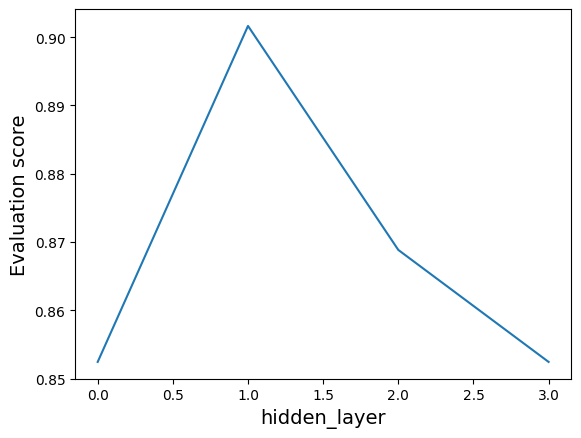

In [120]:
#  the number and size of its layers
layer = [[64,32,16,8,4],[32,16,8,4],[16,8,4],[8,4]]
scores = [] 
for index in range(0,4):
    MLP = MLPClassifier(hidden_layer_sizes=layer[index],activation="relu",random_state=0).fit(X_train, np.ravel(y_train))
    scores.append(MLP.score(X_test, np.ravel(y_test)))

plt.plot(['5','4','3','2'],scores)
plt.xlabel("hidden_layer", fontsize=14)
plt.ylabel("Evaluation score", fontsize=14)

# More layers doesn't means better performance

D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Opti

Text(0, 0.5, 'Evaluation score')

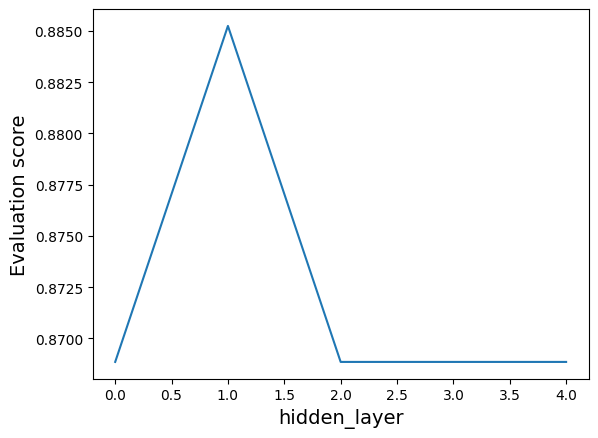

In [121]:
#  the number and size of its layers
layer = [[128,64,32],[64,32,16],[32,16,8],[16,8,4],[8,4,2]]
scores = [] 
for index in range(0,5):
    MLP = MLPClassifier(hidden_layer_sizes=layer[index],activation="relu",random_state=0).fit(X_train, np.ravel(y_train))
    scores.append(MLP.score(X_test, np.ravel(y_test)))

plt.plot(range(0,5),scores)
plt.xlabel("hidden_layer", fontsize=14)
plt.ylabel("Evaluation score", fontsize=14)

# larger size of layers doesn't means better performance

D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Opti

Text(0, 0.5, 'Evaluation score')

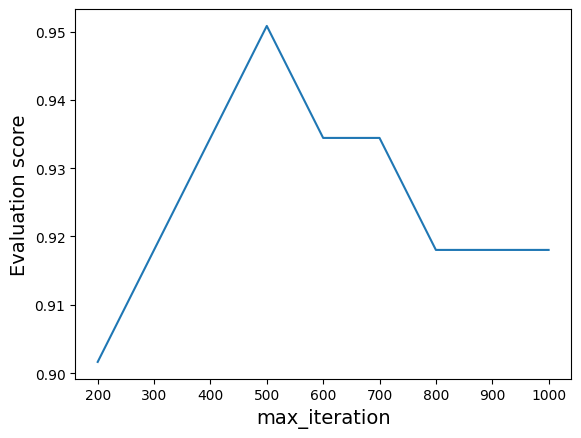

In [122]:
# [32, 16, 8, 4] is the hidden-layer configuration with the best accuracy, but did not converge, so increase the iteration number
# this parameter also determines the number of epochs (how many times each data point will be used)
max_iteration = []
scores=[]
for num in range(200,1100,100):
    MLP = MLPClassifier(hidden_layer_sizes=[32, 16, 8, 4],activation="relu",random_state=0,max_iter=num).fit(X_train, np.ravel(y_train))
    scores.append(MLP.score(X_test, np.ravel(y_test)))
    max_iteration.append(num)
    
plt.plot(max_iteration,scores)
plt.xlabel("max_iteration", fontsize=14)
plt.ylabel("Evaluation score", fontsize=14)   

# The learning process of the classifier converges after 800 iterations. 
# The accuracy decreases when the iterations is too high

D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Opti

The average score of 500 iterations: 0.8020430107526881
The average score of 1000 iterations: 0.7921505376344087


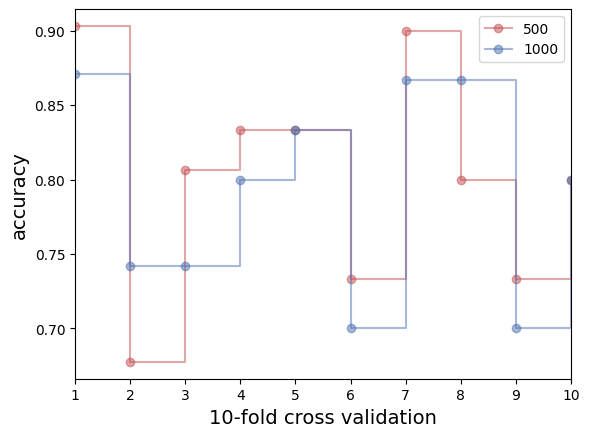

In [123]:
MLP1 = MLPClassifier(hidden_layer_sizes=[32, 16, 8, 4],activation="relu",random_state=0,max_iter=500).fit(X_train, np.ravel(y_train))
scores1 = cross_val_score(MLP1, X, np.ravel(y), cv=10)

MLP2 = MLPClassifier(hidden_layer_sizes=[32, 16, 8, 4],activation="relu",random_state=0,max_iter=1000).fit(X_train, np.ravel(y_train))
scores2 = cross_val_score(MLP2, X, np.ravel(y), cv=10)

plt.plot(range(1,11),scores1,'r',alpha=0.5, marker="o", drawstyle="steps-post",label = '500')
plt.plot(range(1,11),scores2,'b',alpha=0.5, marker="o", drawstyle="steps-post",label = '1000')
plt.xlabel("10-fold cross validation", fontsize=14,)
plt.ylabel("accuracy", fontsize=14)
plt.xlim(1, 10)
plt.legend()

print('The average score of 500 iterations:',scores1.mean())
print('The average score of 1000 iterations:',scores2.mean())

# 10-fold cross validation
# Although the training cannot converge within 500 iterations, its average score is higher than that of 1000 iterations

D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0, 0.5, 'Evaluation score')

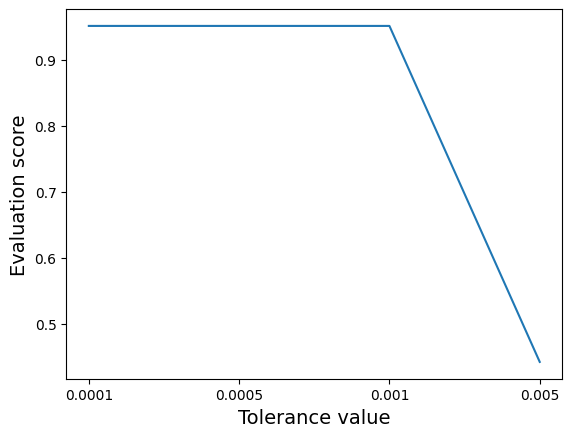

In [124]:
# The failure of convergence is also related to tolerance for the optimization.
tol_value = [1e-4,5e-4,1e-3,5e-3]
scores = [] 
for index in range(0,4):
    MLP = MLPClassifier(hidden_layer_sizes=[32, 16, 8, 4],activation="relu",
                        random_state=0,tol=tol_value[index],max_iter=500).fit(X_train, np.ravel(y_train))
    scores.append(MLP.score(X_test, np.ravel(y_test)))

x_label = [str(lab) for lab in tol_value]
plt.plot(x_label,scores)
plt.xlabel("Tolerance value", fontsize=14)
plt.ylabel("Evaluation score", fontsize=14)

# increasing the tolerance for the optimization can make the training converge but the accuracy may decrease.

Text(0, 0.5, 'Evaluation score')

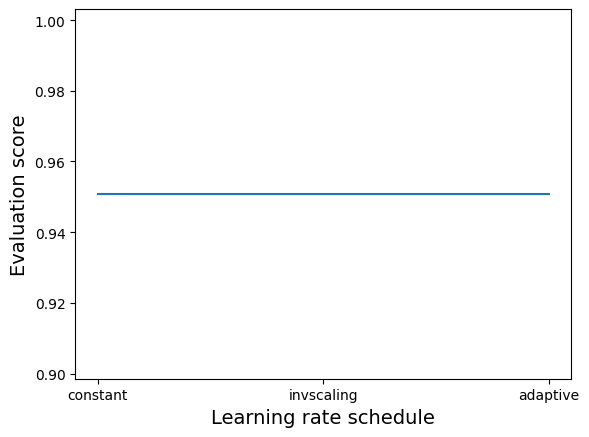

In [125]:
# Learning rate schedule for weight updates
update_schedule = ["constant","invscaling","adaptive"]
scores = [] 
for index in range(0,3):
    MLP = MLPClassifier(hidden_layer_sizes=[32, 16, 8, 4],
                        activation="relu",
                        learning_rate = update_schedule[index],
                        tol=1e-3,
                        random_state=0,max_iter=500).fit(X_train, np.ravel(y_train))
    scores.append(MLP.score(X_test, np.ravel(y_test)))

plt.plot(update_schedule,scores)
plt.xlabel("Learning rate schedule", fontsize=14)
plt.ylabel("Evaluation score", fontsize=14)

Text(0, 0.5, 'Evaluation score')

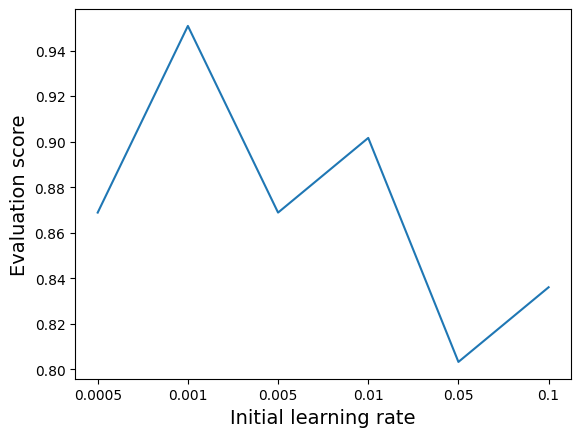

In [126]:
# The initial learning rate
rate = [0.0005,0.001,0.005,0.01,0.05,0.1]
scores = [] 
for index in range(0,6):
    MLP = MLPClassifier(hidden_layer_sizes=[32, 16, 8, 4],
                        solver='adam',
                        activation="relu",
                        learning_rate = "adaptive",
                        learning_rate_init = rate[index],
                        tol=1e-3,
                        random_state=0,
                        max_iter=500).fit(X_train, np.ravel(y_train))
    scores.append(MLP.score(X_test, np.ravel(y_test)))

x_label = [str(lab) for lab in rate]
plt.plot(x_label,scores)
plt.xlabel("Initial learning rate", fontsize=14)
plt.ylabel("Evaluation score", fontsize=14)
# the best initial learning rate is 0.001

Text(0, 0.5, 'Evaluation score')

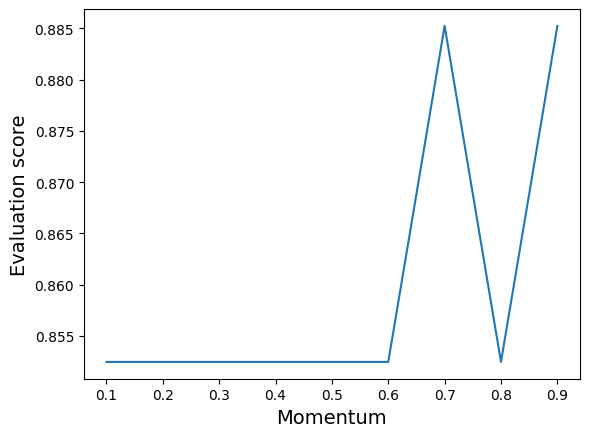

In [127]:
# momentum
mom = np.array(range(1,10))*0.1
scores = [] 
for value in mom:
    MLP = MLPClassifier(hidden_layer_sizes=[32, 16, 8, 4],
                        solver='sgd',
                        activation="relu",
                        learning_rate = "adaptive",
                        learning_rate_init = rate[index],
                        tol=1e-3,
                        random_state=0,
                        momentum=value,
                        max_iter=500).fit(X_train, np.ravel(y_train))
    scores.append(MLP.score(X_test, np.ravel(y_test)))

plt.plot(mom,scores)
plt.xlabel("Momentum", fontsize=14)
plt.ylabel("Evaluation score", fontsize=14)

Accuracy : 0.9508196721311475
sensitivity : 0.9259259259259259
Specificity : 0.9705882352941176
Recall   : 0.9705882352941176
Precision: 0.9428571428571428
F score : 0.9565217391304348


<AxesSubplot:>

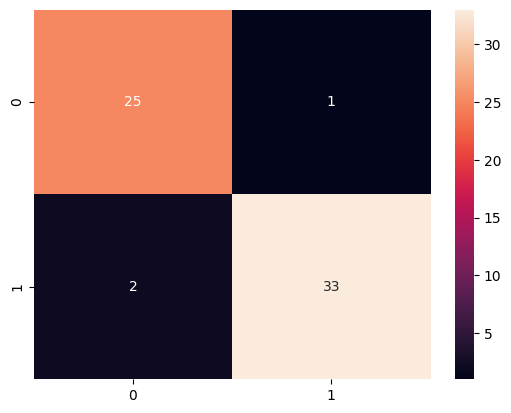

In [128]:
# Classifier with the best configurations
MLP = MLPClassifier(hidden_layer_sizes=[32, 16, 8, 4],
                        solver='adam',
                        activation="relu",
                        learning_rate = "adaptive",
                        learning_rate_init = 0.001,
                        tol=1e-3,
                        random_state=0,
                        max_iter=500).fit(X_train, np.ravel(y_train))
y_pre = MLP.predict(X_test)
cm = confusion_matrix(y_pre, y_test)

tn = cm[0,0]# no stroke,right prediction 
fp = cm[1,0]# no stroke,but wrong prediction
tp = cm[1,1]# stroke,right prediction
fn = cm[0,1]# stroke,but wrong prediction

accuracy  = (tp + tn) / (tp + fp + tn + fn)
specificity = tp / (tp + fn)# how many real stroke patient are found.
sensitivity = tn / (tn + fp)# how many healthy people  are found.
precision = tp / (tp + fp)# how many real stroke patient are found.
recall    = tp / (tp + fn)# the right alarm rate in all stroke alarm.
fmeasure  = 2 * precision * recall / (precision + recall)

print(f'Accuracy : {accuracy}')
print(f'sensitivity : {sensitivity}')
print(f'Specificity : {specificity}')
print(f'Recall   : {recall}')
print(f'Precision: {precision}')
print(f'F score : {fmeasure}') 

sns.heatmap(cm, annot=True)
# The best classifier so far. 

# Part 5 Principal Component Analysis 

PCA is a technique for  dimensionality reduction, lossy data compression, feature extraction, and data visualisation.PCA is defined as the orthogonal projection of the data onto a lower dimensional linear space such that the variance of the projected data is maximised.In this part, I use PCA to enhance the clustering performance of Kmeans.

In [129]:
from sklearn.decomposition import PCA
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


In [240]:
pca = PCA(n_components=13,random_state=0)
pca.fit(X)

PCA(n_components=13, random_state=0)

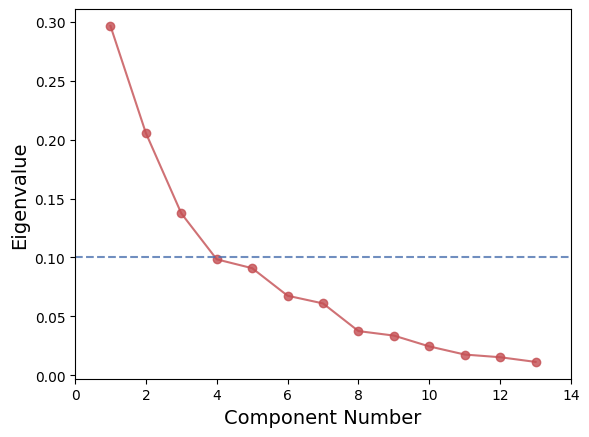

In [241]:
# scree plots
plt.plot(range(1,14),pca.explained_variance_,'r',alpha=0.8, marker="o")
plt.xlabel("Component Number", fontsize=14)
plt.ylabel("Eigenvalue", fontsize=14)
plt.xlim(0, 14)
plt.plot([0,14],[0.1,0.1],'b--',alpha=0.8)
# the suitable component number is 3

In [245]:
# dimensionality reduction
train_set, test_set = train_test_split(patient2, test_size=0.2, random_state=0)
X_train = train_set[attributes]
y_train = train_set[target]
X_test = test_set[attributes]
y_test = test_set[target]

pca = PCA(n_components=4,random_state=0)
pca.fit(X)
X_new = pca.transform(X)
X_train_new = pca.transform(X_train)
X_test_new = pca.transform(X_test)
print('X',X)
print('X_new',X_new)

X           age  sex        cp  trestbps      chol  fbs  restecg   thalach  \
0    0.708333  1.0  1.000000  0.481132  0.244292  1.0      0.0  0.603053   
1    0.166667  1.0  0.666667  0.339623  0.283105  0.0      0.5  0.885496   
2    0.250000  0.0  0.333333  0.339623  0.178082  0.0      0.0  0.770992   
3    0.562500  1.0  0.333333  0.245283  0.251142  0.0      0.5  0.816794   
4    0.583333  0.0  0.000000  0.245283  0.520548  0.0      0.5  0.702290   
..        ...  ...       ...       ...       ...  ...      ...       ...   
298  0.583333  0.0  0.000000  0.433962  0.262557  0.0      0.5  0.396947   
299  0.333333  1.0  1.000000  0.150943  0.315068  0.0      0.5  0.465649   
300  0.812500  1.0  0.000000  0.471698  0.152968  1.0      0.5  0.534351   
301  0.583333  1.0  0.000000  0.339623  0.011416  0.0      0.5  0.335878   
302  0.583333  0.0  0.333333  0.339623  0.251142  0.0      0.0  0.786260   

     exang   oldpeak  slope    ca      thal  
0      0.0  0.370968    0.0  0.00  0.33

In [246]:
# clustering without PCA
kmeans = KMeans(n_clusters=2,random_state=0)
y_pre = kmeans.fit_predict(X)
cm = confusion_matrix(y_pre, y)

tn = cm[0,0]# no stroke,right prediction 
fp = cm[1,0]# no stroke,but wrong prediction
tp = cm[1,1]# stroke,right prediction
fn = cm[0,1]# stroke,but wrong prediction

accuracy  = (tp + tn) / (tp + fp + tn + fn)
specificity = tp / (tp + fn)# how many real stroke patient are found.
sensitivity = tn / (tn + fp)# how many healthy people  are found.
precision = tp / (tp + fp)# how many real stroke patient are found.
recall    = tp / (tp + fn)# the right alarm rate in all stroke alarm.
fmeasure  = 2 * precision * recall / (precision + recall)

print(f'Accuracy : {accuracy}')
print(f'sensitivity : {sensitivity}')
print(f'Specificity : {specificity}')
print(f'Recall   : {recall}')
print(f'Precision: {precision}')
print(f'F score : {fmeasure}') 

Accuracy : 0.7194719471947195
sensitivity : 0.5507246376811594
Specificity : 0.8606060606060606
Recall   : 0.8606060606060606
Precision: 0.696078431372549
F score : 0.7696476964769647


In [247]:
# clustering with PCA
kmeans = KMeans(n_clusters=2,random_state=0)
y_pre = kmeans.fit_predict(X_new)
cm = confusion_matrix(y_pre, y)

tn = cm[0,0]# no stroke,right prediction 
fp = cm[1,0]# no stroke,but wrong prediction
tp = cm[1,1]# stroke,right prediction
fn = cm[0,1]# stroke,but wrong prediction

accuracy  = (tp + tn) / (tp + fp + tn + fn)
specificity = tp / (tp + fn)# how many real stroke patient are found.
sensitivity = tn / (tn + fp)# how many healthy people  are found.
precision = tp / (tp + fp)# how many real stroke patient are found.
recall    = tp / (tp + fn)# the right alarm rate in all stroke alarm.
fmeasure  = 2 * precision * recall / (precision + recall)

print(f'Accuracy : {accuracy}')
print(f'sensitivity : {sensitivity}')
print(f'Specificity : {specificity}')
print(f'Recall   : {recall}')
print(f'Precision: {precision}')
print(f'F score : {fmeasure}') 

# The clustering performance become better, although the increase of score is small.  

Accuracy : 0.7260726072607261
sensitivity : 0.5579710144927537
Specificity : 0.8666666666666667
Recall   : 0.8666666666666667
Precision: 0.7009803921568627
F score : 0.7750677506775068
